In [ ]:
library(Rfast)
library(Formula)
library(glmtoolbox)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(GLMsData)
library(ssym)

# Punto 3

Este conjunto de datos, disponible en el objeto deposit del paquete $\texttt{GLMsData}$ de $\texttt{R}$, corresponde a un experimento en el que lotes de insectos se expusieron durante seis dı́as a varias dosis (en miligramos) de tres insecticidas. El objetivo del análisis consiste en explicar las diferencias entre los lotes con respecto a la proporción de insectos que terminaron muertos ($\texttt{Killed/Number}$) usando las diferencias entre los lotes con respecto al tipo ($\texttt{Insecticide}$) y la dosis ($\texttt{Deposit}$) del insecticida a la que se expusieron.

**(A)** Haga una análisis descriptivo a los datos. Comente.

In [2]:
data(deposit,package="GLMsData")
str(deposit)

'data.frame':	18 obs. of  4 variables:
 $ Killed     : int  3 5 19 19 24 35 2 14 20 27 ...
 $ Number     : int  50 49 47 38 29 50 50 49 50 50 ...
 $ Insecticide: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 2 2 2 2 ...
 $ Deposit    : num  2 2.64 3.48 4.59 6.06 8 2 2.64 3.48 4.59 ...


In [3]:
summary(deposit)

     Killed          Number      Insecticide    Deposit     
 Min.   : 2.00   Min.   :29.00   A:6         Min.   :2.000  
 1st Qu.:19.00   1st Qu.:49.25   B:6         1st Qu.:2.640  
 Median :27.50   Median :50.00   C:6         Median :4.035  
 Mean   :28.11   Mean   :47.89               Mean   :4.462  
 3rd Qu.:40.75   3rd Qu.:50.00               3rd Qu.:6.060  
 Max.   :50.00   Max.   :50.00               Max.   :8.000  

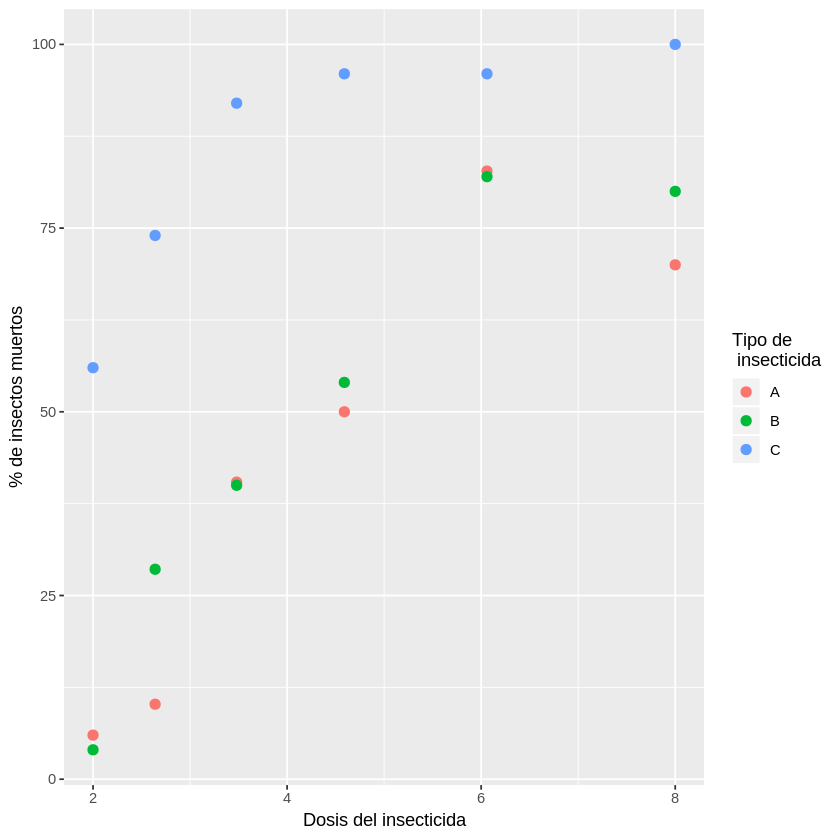

In [4]:
ggplot(deposit,aes(x=Deposit,col=Insecticide)) +
       geom_point(aes(y=100*Killed/Number),size=2.5) +
	   labs(x="Dosis del insecticida",y="% de insectos muertos",col="Tipo de\n insecticida")

**(B)** Ajuste a los datos modelos de respuesta binomial con varias funciones de enlace (logit, probit, complemento log-log, y Cauchy) y el predictor lineal dado por $1 + \texttt{Insecticide} + \texttt{I(1/Deposit)}
$. Use los criterios AIC, BIC y $R^2$ ajustado para comparar y seleccionar el “mejor” modelo.

In [5]:
fit1 <- glm(Killed/Number ~ Insecticide + I(1/Deposit), weights=Number, family=binomial, data=deposit)
fit2 <- update(fit1, family=binomial(probit))
fit3 <- update(fit1, family=binomial(cloglog))
fit4 <- update(fit1, family=binomial(cauchit))

In [6]:
AIC(fit1,fit2,fit3,fit4)
BIC(fit1,fit2,fit3,fit4)
adjR2(fit1,fit2,fit3,fit4)

,df,AIC
fit1,4,85.93253
fit2,4,85.86065
fit3,4,98.62502
fit4,4,99.84587


,df,BIC
fit1,4,89.49402
fit2,4,89.42214
fit3,4,102.18651
fit4,4,103.40735


     Deviance R-squared df adj.R-squared
fit1 15.73499    0.9620  4        0.9538
fit2 15.66311    0.9621  4        0.9540
fit3 28.42748    0.9313  4        0.9165
fit4 29.64832    0.9283  4        0.9130


In [7]:
summary(fit2)


Call:
glm(formula = Killed/Number ~ Insecticide + I(1/Deposit), family = binomial(probit), 
    data = deposit, weights = Number)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4413  -0.7618  -0.1335   0.7771   1.9819  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.4675     0.1467  10.005   <2e-16 ***
InsecticideB   0.1954     0.1193   1.638    0.101    
InsecticideC   1.7043     0.1457  11.695   <2e-16 ***
I(1/Deposit)  -6.3386     0.4567 -13.879   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 413.644  on 17  degrees of freedom
Residual deviance:  15.663  on 14  degrees of freedom
AIC: 85.861

Number of Fisher Scoring iterations: 4


**(C)** Haga un gráfico de los datos junto con el modelo seleccionado. Comente.

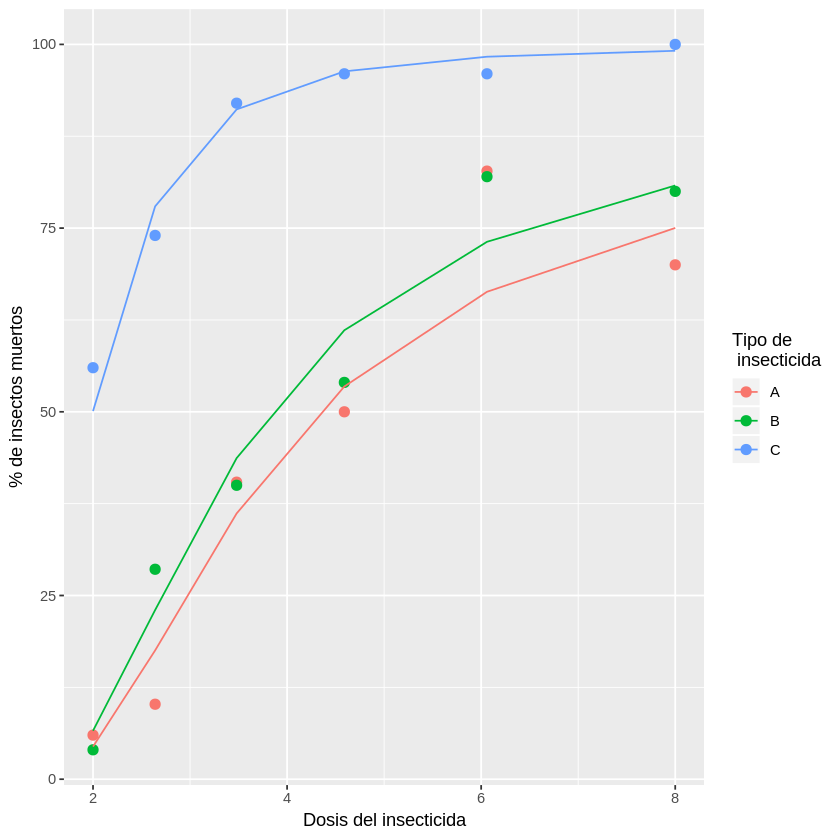

In [8]:
deposit2 <- data.frame(deposit,mu=fitted(fit2))
ggplot(deposit2,aes(x=Deposit,col=Insecticide)) +
       geom_point(aes(y=100*Killed/Number),size=2.5) +
	   geom_line(aes(y=100*mu)) +
	   labs(x="Dosis del insecticida",y="% de insectos muertos",col="Tipo de\n insecticida")

**(D)** Use las estadı́sticas de Wald y razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5%, si la proporción esperada de insectos muertos depende de la interación entre $\texttt{Insecticide}$ y $\texttt{I(1/Deposit)}$.

In [9]:
fit2a <- update(fit2,formula=. ~ . + Insecticide:I(1/Deposit))
anova2(fit2,fit2a,test="wald")
anova2(fit2,fit2a,test="lr")


  Wald test 

Model 1 :  Killed/Number ~ Insecticide + I(1/Deposit) 
Model 2 :  Killed/Number ~ Insecticide + I(1/Deposit) + Insecticide:I(1/Deposit) 

         Chi    df  Pr(Chisq>)
1 vs 2 0.83517   2      0.6586

  Likelihood-ratio test 

Model 1 :  Killed/Number ~ Insecticide + I(1/Deposit) 
Model 2 :  Killed/Number ~ Insecticide + I(1/Deposit) + Insecticide:I(1/Deposit) 

         Chi    df  Pr(Chisq>)
1 vs 2 0.81609   2       0.665


**(E)** Haga el análisis de diagnóstico al modelo (análisis residual y análisis de sensibilidad). Comente.

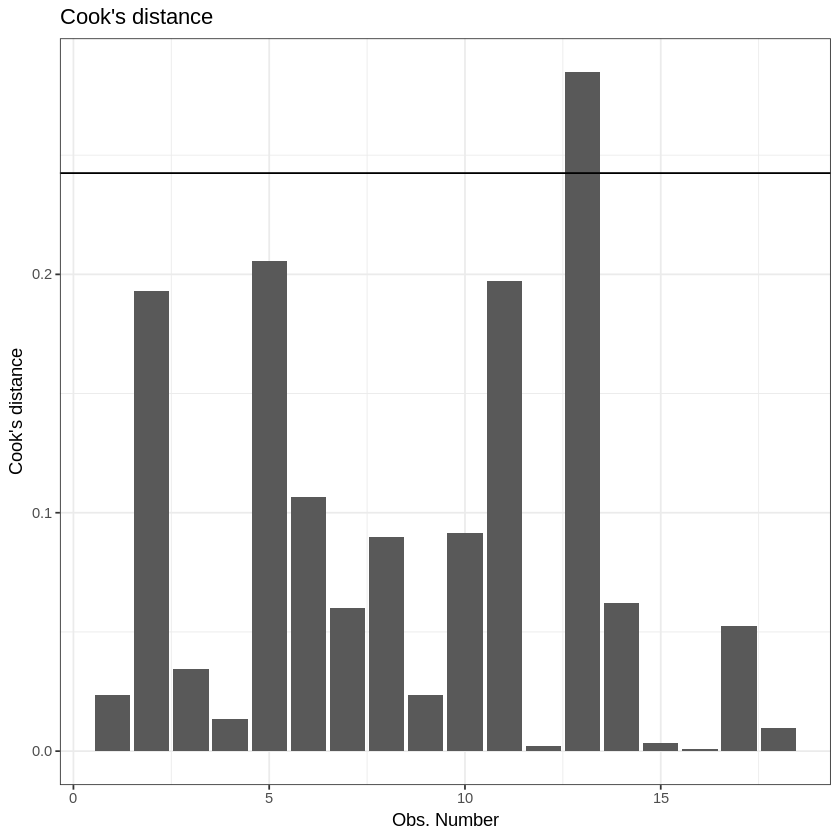

In [10]:
cd <- cooks.distance(fit2)
p4<-ggplot(fit2, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [11]:
deposit2 <- data.frame(deposit,mu=fitted(fit2))
deposit2[c(13),]

,Killed,Number,Insecticide,Deposit,mu
13,28,50,C,2,0.5010073


In [12]:
fit2a <- update(fit2,subset=-c(13))
cbind("coef"=fit2$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit2))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit2)/(sqrt(diag(vcov(fit2))))), nrow(model.matrix(fit2))-ncol(model.matrix(fit2))),
      "coef*" = fit2a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit2a))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit2a)/(sqrt(diag(vcov(fit2a))))), nrow(model.matrix(fit2a))-ncol(model.matrix(fit2a))),
      "Cambio coef(%)" = 100*(fit2a$coefficients-fit2$coefficients)/abs(fit2$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit2a)))-sqrt(diag(vcov(fit2))))/abs(sqrt(diag(vcov(fit2))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),1.46752,0.14668,0.00000,1.53103,0.15788,0.00000,4.32760,7.63716
InsecticideB,0.19539,0.11931,0.12376,0.19603,0.12023,0.12697,0.32778,0.76744
InsecticideC,1.70431,0.14573,0.00000,1.63777,0.15511,0.00000,-3.90450,6.43419
I(1/Deposit),-6.33862,0.45670,0.00000,-6.58640,0.51127,0.00000,-3.90914,11.94777


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


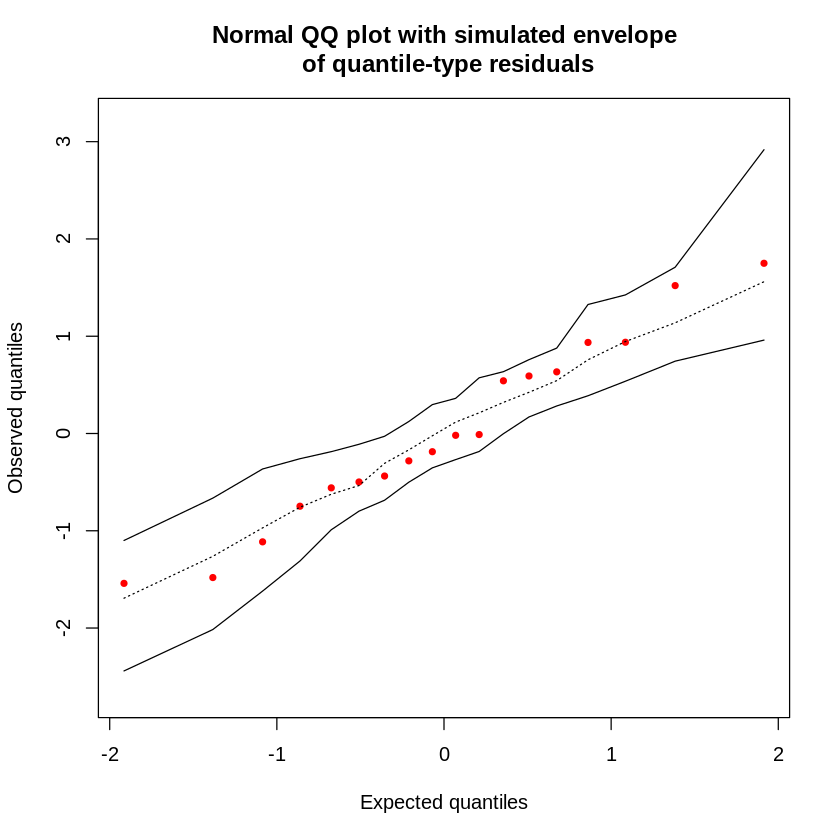

In [13]:
set.seed(02102022)
glmtoolbox::envelope(fit2,type="quantile",rep=50,col="red")

**(F)** Estime la proporción esperada de insectos muertos en un lote que se expone a una dosis de 5 miligramos del insecticida del tipo A. Haga esta estimación “manualmente” y usando la función $\texttt{predict()}$.

In [14]:
eta <- coef(fit2)[1] + coef(fit2)[4]/5
pnorm(eta)

predict(fit2,newdata=data.frame(Deposit=5,Insecticide="A"),type="response")

(Intercept) 
  0.5791806

1 
0.5791806

# Punto 4

Estos datos, analizados por Charpentier (2015, página 166) y disponibles en el objeto $\texttt{credit}$ del paquete $\texttt{CASdatasets}$ de $\texttt{R}$, corresponden a la información de 1000 créditos bancarios, en que los créditos considerados “buenos” y “malos” se identifican como $\texttt{class = 0}$ y $\texttt{class = 1}$, respectivamente. El objetivo del análisis consiste en explicar las diferencias entre los créditos con respecto a si son considerados “buenos” o “malos” usando  diferencias entre los créditos como su duración ($\texttt{duration}$), en meses, su objetivo ($\texttt{purpose}$) y su valor, en marcos alemanes ($\texttt{credit.amount}$); y de algunas caracterı́sticas del cliente como su historial crediticio ($\texttt{credit.history}$), su edad ($\texttt{age}$), en años, el tiempo en su empleo actual ($\texttt{employment}$), su estado civil y su género ($\texttt{personal.status}$), ası́ como su tipo de trabajo ($\texttt{job}$) y su tipo de alojamiento ($\texttt{housing}$).

**(A)** Haga una análisis descriptivo a los datos. Comente.

In [15]:
data(credit,package="CASdatasets")

In [16]:
credit = select(credit, c(class, duration, purpose, credit_amount, credit_history, 
                          age, employment, personal_status, job, housing))

In [17]:
str(credit)

'data.frame':	1000 obs. of  10 variables:
 $ class          : num  0 1 0 0 1 0 0 0 0 1 ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ purpose        : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ credit_amount  : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ credit_history : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ employment     : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ personal_status: Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ job            : Factor w/ 4 levels "A171","A172",..: 3 3 2 3 3 2 3 4 2 4 ...
 $ housing        : Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...


+ covariables numéricas

In [18]:
tbl_res = sapply(select_if(credit, is.integer), function(x) 
    rbind(mean(x), sd(x), min(x), quantile(x, 0.25), median(x), quantile(x, 0.75), max(x), sd(x)/mean(x))) %>% 
                  as.data.frame() %>% 
                  `row.names<-`(c("mean","Std.Dev.","min", "Q1", "median", "Q3", "max", "coef_var"))
knitr::kable(x = tbl_res, digits = 2, align = "c") 



|         | duration | credit_amount |  age  |
|:--------|:--------:|:-------------:|:-----:|
|mean     |  20.90   |    3271.26    | 35.55 |
|Std.Dev. |  12.06   |    2822.74    | 11.38 |
|min      |   4.00   |    250.00     | 19.00 |
|Q1       |  12.00   |    1365.50    | 27.00 |
|median   |  18.00   |    2319.50    | 33.00 |
|Q3       |  24.00   |    3972.25    | 42.00 |
|max      |  72.00   |   18424.00    | 75.00 |
|coef_var |   0.58   |     0.86      | 0.32  |

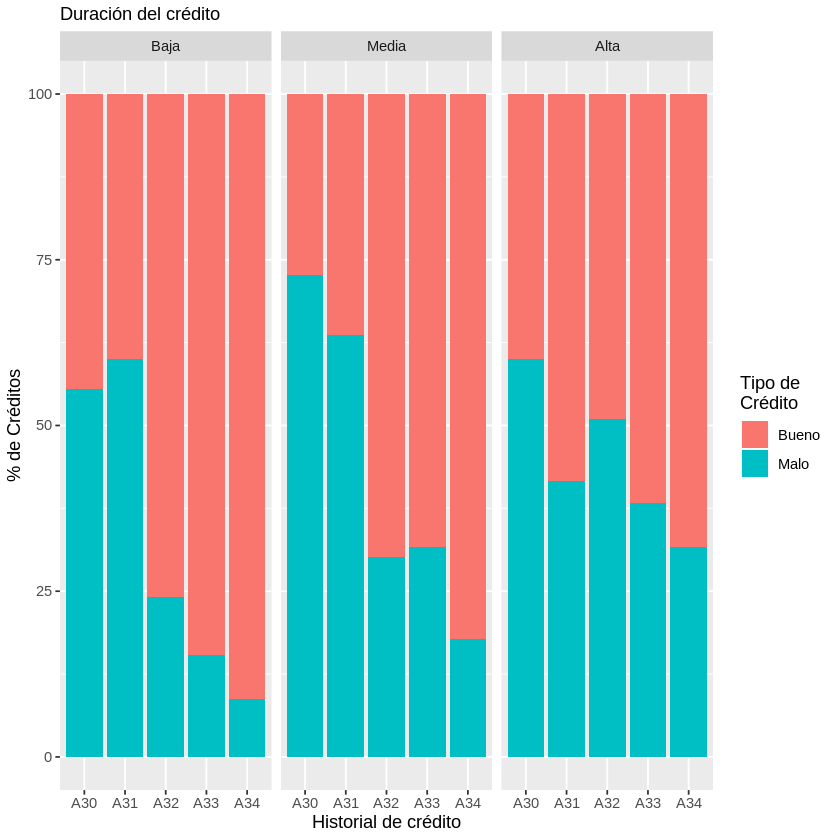

In [19]:
credit <- within(credit,z <- factor(class,labels=c("Bueno","Malo")))
names <- c("Baja","Media","Alta")
credit <- within(credit,durationC <- cut_number(duration,n=3,labels=names))
ggplot(credit) +
	  geom_bar(aes(x=credit_history,fill=z),position="fill") +
      scale_y_continuous(name="% de Créditos",breaks=seq(0,1,0.25),labels=seq(0,100,25)) +
	  labs(x="Historial de crédito",fill="Tipo de\nCrédito",subtitle="Duración del crédito") + 
      facet_wrap(vars(durationC))

+ covariables categóricas

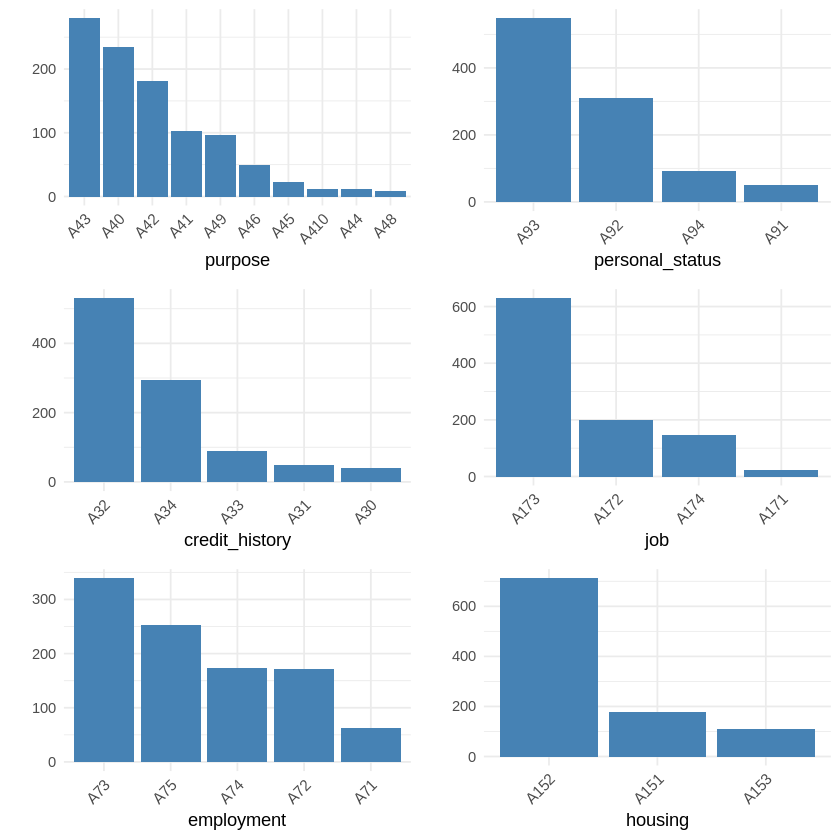

In [20]:
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

gg_list1 <- lapply(credit[,-c(1,2,4,6,11,12)],function(y) ggplot(credit[,-c(1,2,4,6)], aes(x = reorder_size(y))) + geom_bar(fill="steelblue") + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) )

for(i in 1:length(gg_list1)){
  gg_list1[[i]]$labels[1] = names(credit[,-c(1,2,4,6,11,12)])[i]
  gg_list1[[i]]$labels[2] = ""
}

grid.arrange(grobs = c(gg_list1), ncol = 2, as.table = FALSE)

+ variable respuesta

In [21]:
count(credit,class)

class,n
0,700
1,300


**(B)** Divida la muestra en dos grupos: aprendizaje (70 \%) y validación (30 \%). Ajuste a los datos modelos que asumen que los 700 valores de la variable respuesta, definida como 0 para un crédito “malo” y 1 para un crédito “bueno”, son realizaciones de variables aleatorias independientes con distribución de Bernoulli. Considere diferentes funciones de enlace (logit, probit, complemento log-log, y Cauchy) y el siguiente predictor lineal

$$
\eta = 1 + \texttt{duration} + \texttt{purpose} + \texttt{credit.amount} + \texttt{credit.history}
+ \texttt{age} + \texttt{employment} + \texttt{personal.status} + \texttt{job} + \texttt{housing}.
$$

Use el criterio BIC para comparar los modelos candidatos y seleccionar el “mejor”.

In [22]:
set.seed(9226)
credit_training <- credit[sample(row.names(credit), nrow(credit)*0.7, replace = FALSE),]
credit_valid <- anti_join(credit,credit_training)

Joining, by = c("class", "duration", "purpose", "credit_amount",
"credit_history", "age", "employment", "personal_status", "job", "housing",
"z", "durationC")

+ ajuste de modelos con diferentes funciones de enlace

In [23]:
fit1 <- glm(class ~ duration + purpose + credit_amount + credit_history + age + employment + 
            personal_status+ job + housing, family=binomial(link="logit"), data=credit_training)

In [24]:
fit2 <- glm(class ~ duration + purpose + credit_amount + credit_history + age + employment + 
            personal_status+job + housing, family=binomial(link="probit"),data=credit_training)

In [25]:
fit3 <- glm(class ~ duration + purpose + credit_amount + credit_history + age + employment + 
            personal_status+job + housing, family=binomial(link="cloglog"), 
            control = list ( epsilon = 1e-8, maxit = 100 , trace =F), data=credit_training)

In [26]:
fit4 <- glm(class ~ duration + purpose + credit_amount + credit_history + age + employment + 
            personal_status+job + housing, family=binomial(link="cauchit"),data=credit_training)

+ selección de modelos con base en el bic

In [27]:
glmtoolbox::stepCriterion(fit1, criterion="bic", direction="backward")


       Family:  binomial 
Link function:  logit 

Initial model:
~ duration + purpose + credit_amount + credit_history + age + employment + personal_status + job + housing 


Step 0 :
                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
- purpose           9 797.62 888.64        0.0964    0.0035840
- job               3 784.04 902.37        0.1191    0.8084230
- employment        4 790.62 904.40        0.1101    0.0543288
- personal_status   3 786.21 904.54        0.1165    0.3675157
- credit_amount     1 787.61 915.04        0.1170    0.4580528
- housing           2 792.46 915.34        0.1101    0.0241414
- age               1 790.38 917.81        0.1137    0.0722437
<none>                789.06 921.05        0.1164             
- duration          1 799.91 927.34        0.1022    0.0003904
- credit_history    4 818.10 931.88        0.0771     6.33e-07

Step 1 : - purpose 

                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
- job               3 791.81 869.18  

In [28]:
glmtoolbox::stepCriterion(fit2, criterion="bic", direction="backward")


       Family:  binomial 
Link function:  probit 

Initial model:
~ duration + purpose + credit_amount + credit_history + age + employment + personal_status + job + housing 


Step 0 :
                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
- purpose           9 797.59 888.61        0.0964    0.0029835
- job               3 783.97 902.30        0.1192    0.8243565
- employment        4 790.04 903.82        0.1108    0.0652739
- personal_status   3 785.99 904.31        0.1168    0.3959074
- credit_amount     1 787.55 914.98        0.1171    0.4882189
- housing           2 792.62 915.50        0.1099    0.0227495
- age               1 790.02 917.45        0.1141    0.0907940
<none>                789.06 921.04        0.1164             
- duration          1 800.05 927.48        0.1020    0.0003662
- credit_history    4 818.03 931.81        0.0772    3.769e-07

Step 1 : - purpose 

                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
- job               3 791.81 869.18 

In [29]:
glmtoolbox::stepCriterion(fit3, criterion="bic", direction="forward")


       Family:  binomial 
Link function:  cloglog 

Initial model:
~ 1 


Step 0 :
                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
+ credit_history    4 819.45 842.21        0.0554    8.146e-11
+ duration          1 838.91 848.01        0.0299    7.665e-08
+ credit_amount     1 852.14 861.24        0.0145    6.127e-05
+ housing           2 848.09 861.74        0.0202    2.709e-05
<none>                863.88 868.43        0.0000             
+ age               1 860.12 869.22        0.0053      0.01790
+ employment        4 855.48 878.24        0.0134      0.00185
+ personal_status   3 862.50 880.70        0.0043      0.05626
+ job               3 868.15 886.35       -0.0023      0.62509
+ purpose           9 862.29 907.80        0.0100      0.03078

Step 1 : + credit_history 

                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
+ duration          1 802.79 830.10        0.0759    9.059e-06
+ credit_amount     1 811.66 838.97        0.0655    0.0008052
+ hou

In [30]:
glmtoolbox::stepCriterion(fit4, criterion="bic", direction="forward")


       Family:  binomial 
Link function:  cauchit 

Initial model:
~ 1 


Step 0 :
                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
+ credit_history    4 819.45 842.21        0.0554    1.375e-06
+ duration          1 839.18 848.28        0.0296    7.851e-07
+ credit_amount     1 851.96 861.06        0.0147    0.0001776
+ housing           2 848.09 861.74        0.0202    4.222e-05
<none>                863.88 868.43        0.0000             
+ age               1 859.39 868.49        0.0061    0.0121809
+ employment        4 855.48 878.24        0.0134    0.0026695
+ personal_status   3 862.50 880.70        0.0043    0.0579285
+ job               3 868.15 886.35       -0.0023    0.6242256
+ purpose           9 862.29 907.80        0.0100    0.0934207

Step 1 : + credit_history 

                   df    AIC    BIC adj.R-squared P(Chisq>)(*)
+ duration          1 802.57 829.88        0.0761    2.523e-05
+ credit_amount     1 810.50 837.80        0.0669     0.001034
<none

+ ajuste de los modelos seleccionados

In [31]:
fit1a <- update(fit1,formula=class ~ duration + credit_history)
fit2a <- update(fit2,formula=class ~ duration + credit_history)
fit3a <- update(fit3,formula=class ~ duration + credit_history)
fit4a <- update(fit4,formula=class ~ duration + credit_history)

In [32]:
BIC(fit1a, fit2a, fit3a, fit4a)
AIC(fit1a, fit2a, fit3a, fit4a)
adjR2(fit1a, fit2a, fit3a, fit4a)

,df,BIC
fit1a,6,827.1587
fit2a,6,826.7614
fit3a,6,830.0983
fit4a,6,829.8763


,df,AIC
fit1a,6,799.8522
fit2a,6,799.4549
fit3a,6,802.7918
fit4a,6,802.5698


      Deviance R-squared df adj.R-squared
fit1a 787.8522    0.0859  6        0.0793
fit2a 787.4549    0.0864  6        0.0798
fit3a 790.7918    0.0825  6        0.0759
fit4a 790.5698    0.0827  6        0.0761


In [33]:
summary(fit2a)


Call:
glm(formula = class ~ duration + credit_history, family = binomial(link = "probit"), 
    data = credit_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8202  -0.8369  -0.6364   1.0861   2.1314  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.243146   0.276854  -0.878  0.37981    
duration           0.020053   0.004314   4.649 3.34e-06 ***
credit_historyA31  0.155599   0.337542   0.461  0.64482    
credit_historyA32 -0.582484   0.260730  -2.234  0.02548 *  
credit_historyA33 -0.882480   0.298866  -2.953  0.00315 ** 
credit_historyA34 -1.140925   0.272218  -4.191 2.77e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 861.88  on 699  degrees of freedom
Residual deviance: 787.45  on 694  degrees of freedom
AIC: 799.45

Number of Fisher Scoring iterations: 4


**(C)** Haga el análisis de diagnóstico al modelo (análisis residual y análisis de sensibilidad). Comente.

+ análisis de sensibilidad

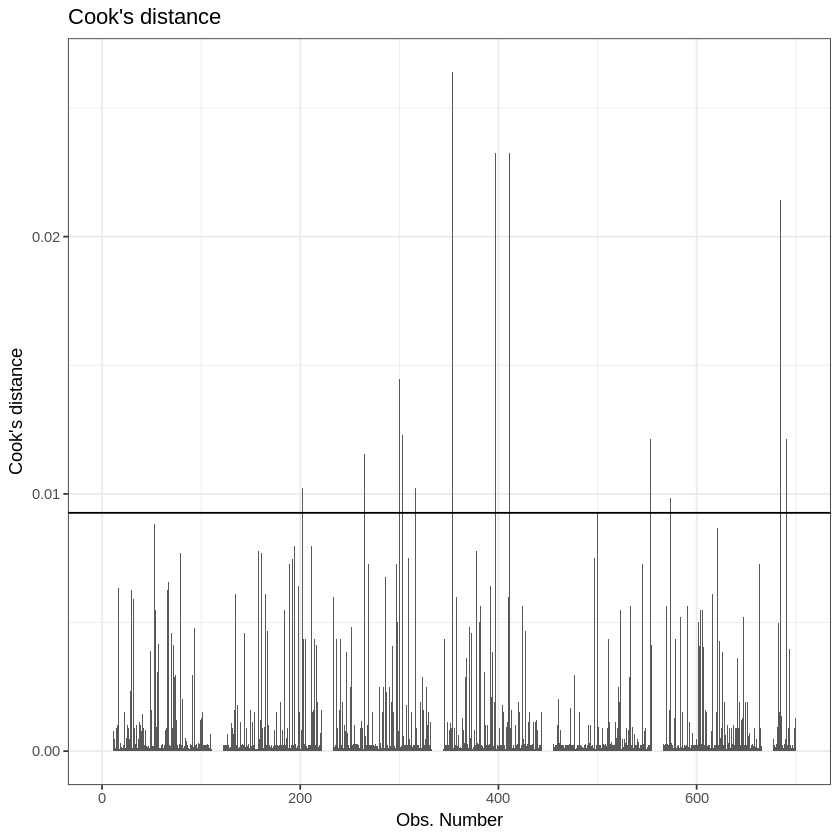

In [34]:
cd <- cooks.distance(fit2a)
p4<-ggplot(fit2a, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 6*mean(cd))
p4

Al examinar el grafico de la distancia de Cook, se observa valores que son substancialmente más grande ques los demás, para determinar si corresponden a un puntos de influencia, se procede a ajustar el modelo sin esas observaciones y comparar si hay cambios significativos en la signficancia de los parámetros o en las estimaciones:

In [35]:
fit2b <- update(fit2a,subset=-c(335,354,397,411,685))
cbind("coef"=fit2a$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit2a))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit2a)/(sqrt(diag(vcov(fit2a))))), nrow(model.matrix(fit2a))-ncol(model.matrix(fit2a))),
      "coef*" = fit2b$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit2b))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit2b)/(sqrt(diag(vcov(fit2b))))), nrow(model.matrix(fit2b))-ncol(model.matrix(fit2b))),
      "Cambio coef(%)" = 100*(fit2b$coefficients-fit2a$coefficients)/abs(fit2a$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit2b)))-sqrt(diag(vcov(fit2a))))/abs(sqrt(diag(vcov(fit2a))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),-0.24315,0.27685,0.38011,-0.03961,0.29642,0.89374,83.70974,7.06718
duration,0.02005,0.00431,0.00000,0.02346,0.00443,0.00000,16.97074,2.59088
credit_historyA31,0.15560,0.33754,0.64496,0.04248,0.36420,0.90717,-72.69608,7.89915
credit_historyA32,-0.58248,0.26073,0.02580,-0.85680,0.28482,0.00272,-47.09421,9.23995
credit_historyA33,-0.88248,0.29887,0.00326,-1.18011,0.32170,0.00026,-33.72601,7.64173
credit_historyA34,-1.14093,0.27222,0.00003,-1.41493,0.29533,0.00000,-24.01638,8.48950


Al remover del conjunto de datos las observaciones con distancia de Cook alta, no se determinan cambios en los signos las estimaciones, ni tampoco en la significancia de los parámetros, por lo tanto se descarta que sean observaciones influyentes.

+ análisis diagnóstico

  |+++++++++++++++++++++++++| 100%


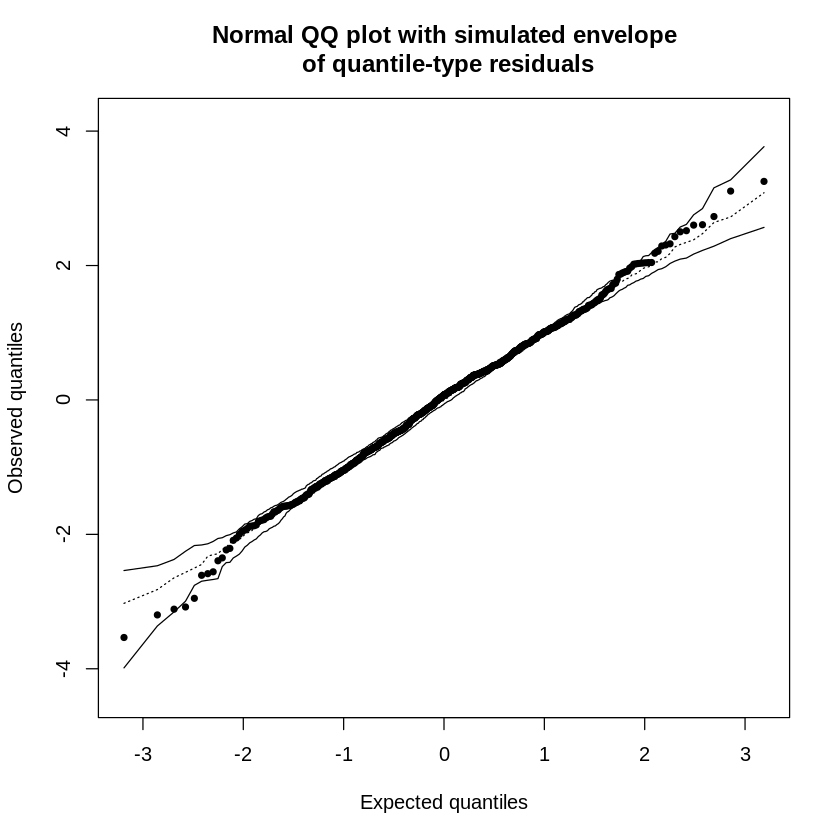

In [36]:
set.seed(02102022)
glmtoolbox::envelope(fit2a,type="quantile")

  |+++++++++++++++++++++++++| 100%


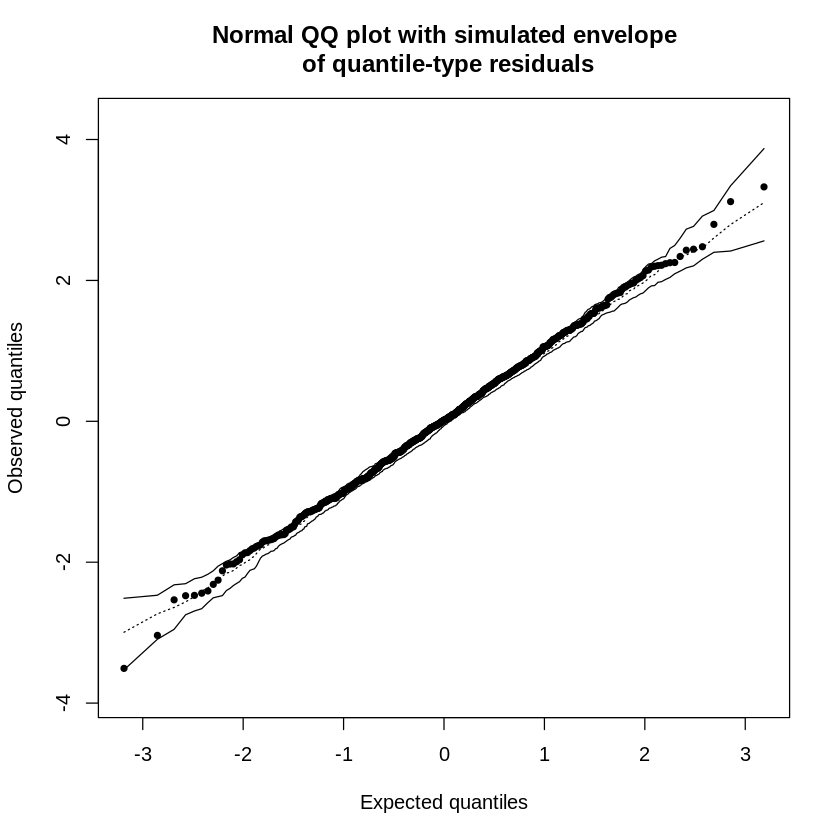

In [37]:
set.seed(02102022)
glmtoolbox::envelope(fit2b,type="quantile")

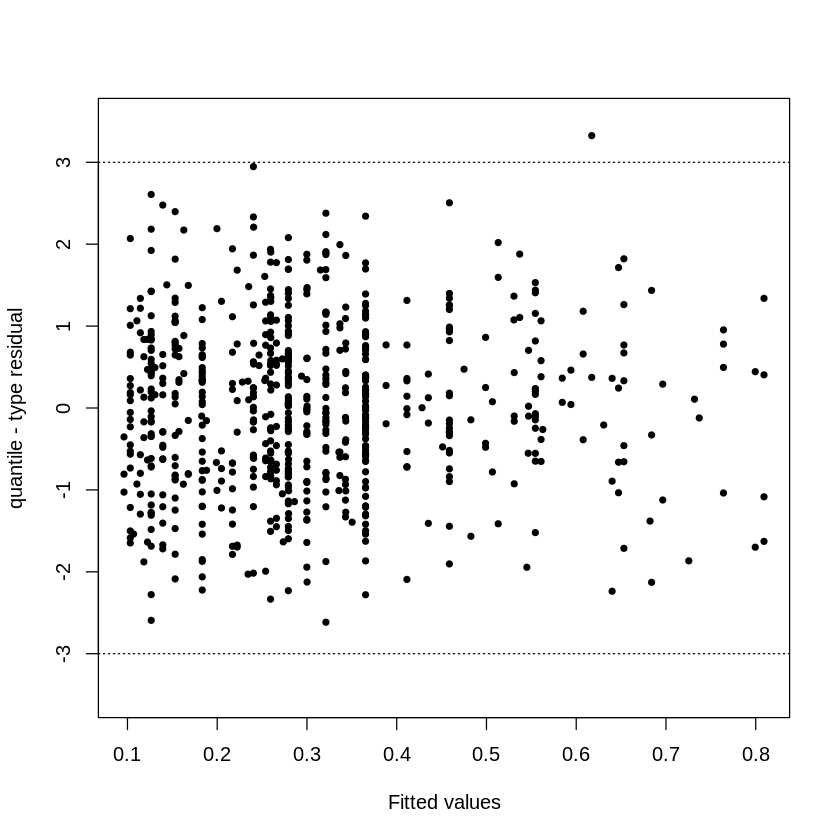

In [38]:
set.seed(02102022)
res_fit2a = glmtoolbox::residuals2(fit2a)

En el gráfico de residuales tipo cuantil se obseva que dos créditos tienen un residuo alto, lo que indica que el valor observado es mayor al pronósticado por el modelo, en este caso corresponde a un crédito "malo" que por los valores de las covariables $\texttt{duration}$ y $\texttt{credit.history}$ ha sido clasificado como bueno por el modelo. Por otra parte, a través de las bandas simuladas se observa que en general los residuales caen dentro de las bandas, con lo cual se concluye que los residuales observados son consistentes con el modelo ajustado que considera función de enlace probit.

**(D)** Interprete los signos de las estimaciones de los parámetros excepto el intercepto.

$\hat{\beta_1}$: A partir de la inversa de la función de enlace (en este caso $\Phi^{-1} (\mu)$ ), se determina que al aumentar la duración del crédito también aumenta la probabilidad que el crédito sea malo ($\texttt{class}=1$). Análogamente se llega a la misma conclusión que la probabilidad que el crédito sea malo aumenta al pasar a la categoria $A31$, mientras que para $\hat{\beta_i}$ con $i = 3, \ldots ,5$, como el signo es negativo en todas las estimaciones, los valores de los coeficientes van disminuyendo a medida que la variable \texttt{credit\_history} cambia de categoría, entonces se concluye que la probabilidad que el crédito sea bueno ($\texttt{class}=0$) es más alta en la categoría $A34$.

**(E)** Use la muestra de validación para calcular el área bajo la curva ROC y así evaluar la capacidad predictiva del modelo construido con la muestra de aprendizaje.

[1] 0 1

 Area Under ROC Curve  =  0.672 
     Gini Coefficient  =  0.343 
        K-S Statistic  =  0.256 
[1] 0 1

 Area Under ROC Curve  =  0.674 
     Gini Coefficient  =  0.348 
        K-S Statistic  =  0.261 


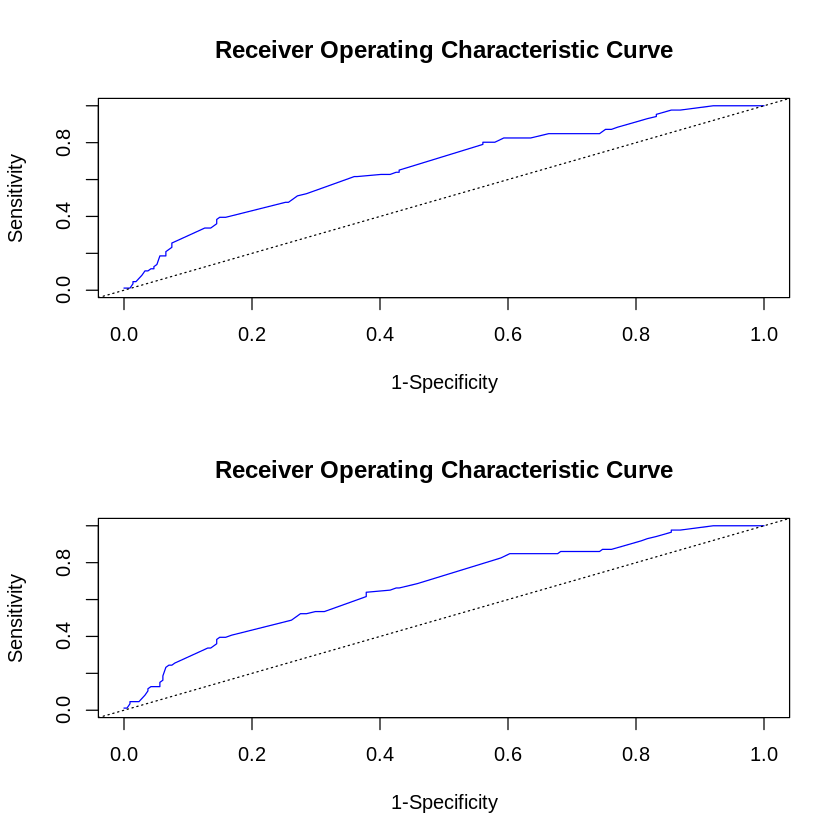

In [39]:
par(mfrow=c(2,1))
probs <- predict(fit2a,newdata=credit_valid,type="response")
glmtoolbox::ROCc(cbind(credit_valid[,"class"],probs))
probs2 <- predict(fit2b,newdata=credit_valid,type="response")
glmtoolbox::ROCc(cbind(credit_valid[,"class"],probs2))

# Punto 5

Estos datos, disponibles en el objeto $\texttt{danishlc}$ del paquete $\texttt{GLMsData}$ de $\texttt{R}$, se refieren al número de casos de cáncer de pulmón ($\texttt{Cases}$) y a la población en riesgo ($\texttt{Pop}$) por grupos de edad ($\texttt{Age}$) en cuatro ciudades danesas ($\texttt{City}$) entre 1968 y 1971.

**(A)** Haga un análisis descriptivo a los datos. Comente.

In [40]:
data(danishlc,package="GLMsData")
str(danishlc)

'data.frame':	24 obs. of  4 variables:
 $ Cases: int  11 11 11 10 11 10 13 6 15 10 ...
 $ Pop  : int  3059 800 710 581 509 605 2879 1083 923 834 ...
 $ Age  : Factor w/ 6 levels ">74","40-54",..: 2 3 4 5 6 1 2 3 4 5 ...
 $ City : Factor w/ 4 levels "Fredericia","Horsens",..: 1 1 1 1 1 1 2 2 2 2 ...


In [41]:
summary(danishlc)

     Cases             Pop            Age            City  
 Min.   : 2.000   Min.   : 509.0   >74  :4   Fredericia:6  
 1st Qu.: 7.000   1st Qu.: 628.0   40-54:4   Horsens   :6  
 Median :10.000   Median : 791.0   55-59:4   Kolding   :6  
 Mean   : 9.333   Mean   :1100.3   60-64:4   Vejle     :6  
 3rd Qu.:11.000   3rd Qu.: 954.8   65-69:4                 
 Max.   :15.000   Max.   :3142.0   70-74:4                 

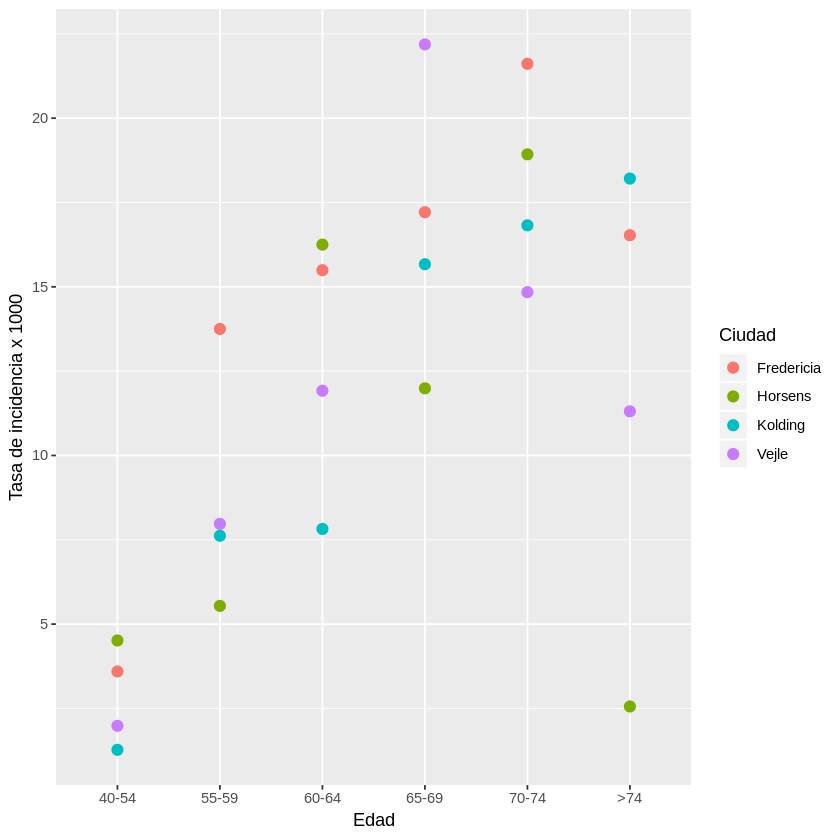

In [42]:
danishlc <- within(danishlc,Age <- factor(Age,levels=c("40-54","55-59","60-64","65-69","70-74",">74")))
ggplot(danishlc) +
       geom_point(aes(x=Age,y=1000*Cases/Pop,col=City),size=2.75) +
	   labs(x="Edad",y="Tasa de incidencia x 1000",col="Ciudad")

**(B)** Ajuste a los datos un modelo que asume que los casos de cáncer de pulmón son realizaciones de variables aleatorias independientes con distribución de Poisson, función de enlace logaritmo natural, $\texttt{offset}$ igual a $\texttt{log(Pop)}$, y las variables explicativas $\texttt{City}$ y $\texttt{Age}$.

In [43]:
fit <- glm(Cases ~ Age + City, offset=log(Pop), family=poisson, data=danishlc)
summary(fit)


Call:
glm(formula = Cases ~ Age + City, family = poisson, data = danishlc, 
    offset = log(Pop))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.63573  -0.67296  -0.03436   0.37258   1.85267  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.6321     0.2003 -28.125  < 2e-16 ***
Age55-59      1.1010     0.2483   4.434 9.23e-06 ***
Age60-64      1.5186     0.2316   6.556 5.53e-11 ***
Age65-69      1.7677     0.2294   7.704 1.31e-14 ***
Age70-74      1.8569     0.2353   7.891 3.00e-15 ***
Age>74        1.4197     0.2503   5.672 1.41e-08 ***
CityHorsens  -0.3301     0.1815  -1.818   0.0690 .  
CityKolding  -0.3715     0.1878  -1.978   0.0479 *  
CityVejle    -0.2723     0.1879  -1.450   0.1472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 129.908  on 23  degrees of freedom
Residual deviance:  23.447  on 15  degrees of freedo

**(C)** Use las estadı́sticas de Wald y razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5 %, si el efecto del grupo de edad sobre la tasa de incidencia de cáncer de pulmón depende de la ciudad.

In [44]:
fit2 <- update(fit,formula=. ~ . + Age*City)
anova2(fit,fit2,test="wald")
anova2(fit,fit2,test="lr")


  Wald test 

Model 1 :  Cases ~ Age + City 
Model 2 :  Cases ~ Age + City + Age:City 

        Chi    df  Pr(Chisq>)
1 vs 2 19.727  15      0.1826

  Likelihood-ratio test 

Model 1 :  Cases ~ Age + City 
Model 2 :  Cases ~ Age + City + Age:City 

        Chi    df  Pr(Chisq>)  
1 vs 2 23.447  15     0.07509 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**(D)** Realice el análisis de diagnóstico (análisis residual y análisis de sensibilidad). Comente.

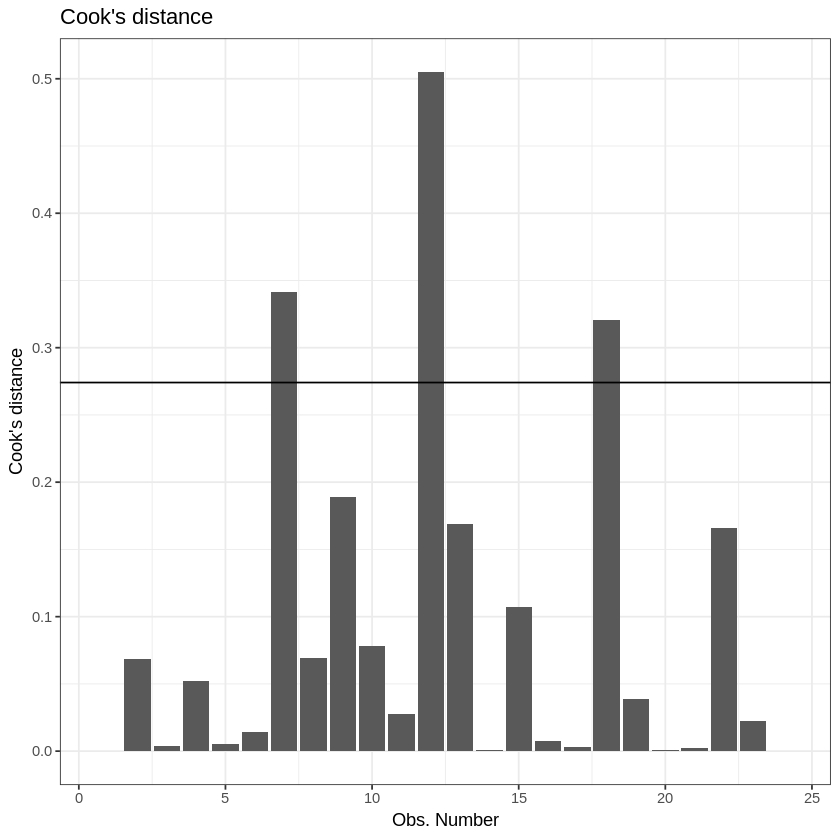

In [45]:
cd <- cooks.distance(fit)
p4<-ggplot(fit, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [46]:
danishlc2 <- data.frame(danishlc,mu=fitted(fit))
danishlc2[c(12),]

,Cases,Pop,Age,City,mu
12,2,782,>74,Horsens,8.326004


In [47]:
fita <- update(fit,subset=-c(12))
cbind("coef"=fit$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit)/(sqrt(diag(vcov(fit))))), nrow(model.matrix(fit))-ncol(model.matrix(fit))),
      "coef*" = fita$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fita))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fita)/(sqrt(diag(vcov(fita))))), nrow(model.matrix(fita))-ncol(model.matrix(fita))),
      "Cambio coef(%)" = 100*(fita$coefficients-fit$coefficients)/abs(fit$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fita)))-sqrt(diag(vcov(fit))))/abs(sqrt(diag(vcov(fit))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),-5.63206,0.20025,0.00000,-5.67281,0.20156,0.00000,-0.72340,0.65147
Age55-59,1.10101,0.24829,0.00048,1.09449,0.24829,0.00060,-0.59293,0.00318
Age60-64,1.51861,0.23164,0.00001,1.51376,0.23163,0.00001,-0.31923,-0.00139
Age65-69,1.76771,0.22944,0.00000,1.75821,0.22947,0.00000,-0.53702,0.01384
Age70-74,1.85686,0.23532,0.00000,1.85053,0.23533,0.00000,-0.34105,0.00455
Age>74,1.41965,0.25027,0.00004,1.70529,0.25777,0.00001,20.12027,2.99681
CityHorsens,-0.33006,0.18150,0.08901,-0.16356,0.18684,0.39614,50.44687,2.94125
CityKolding,-0.37155,0.18781,0.06656,-0.36883,0.18780,0.06972,0.73196,-0.00192
CityVejle,-0.27232,0.18785,0.16775,-0.27110,0.18784,0.17095,0.44563,-0.00590


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


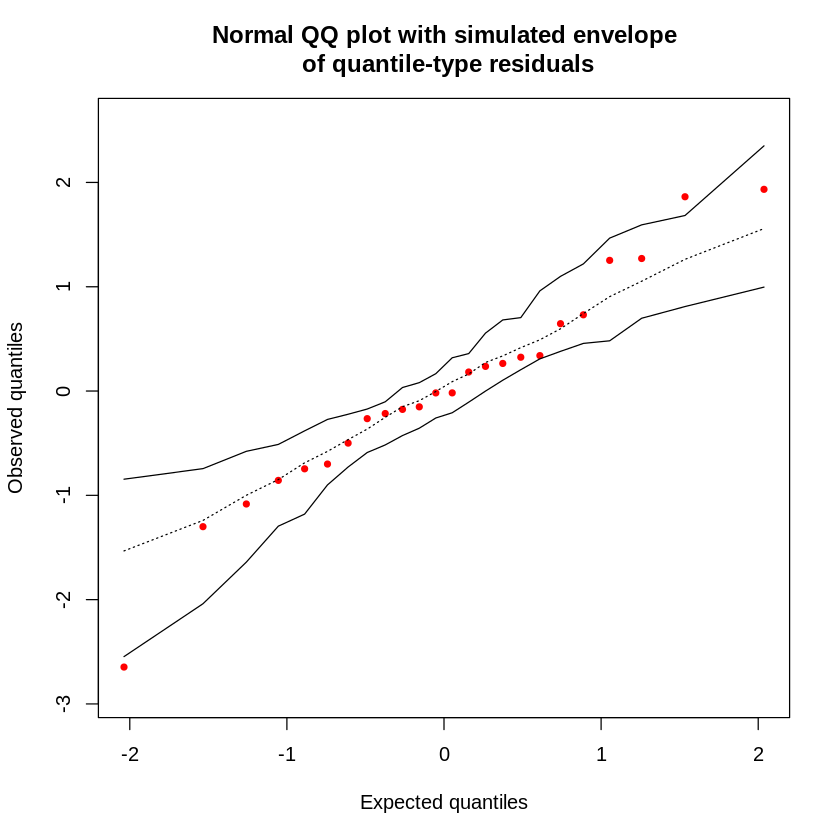

In [48]:
set.seed(02102022)
glmtoolbox::envelope(fit,type="quantile",rep=50,col="red",identify=2)

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


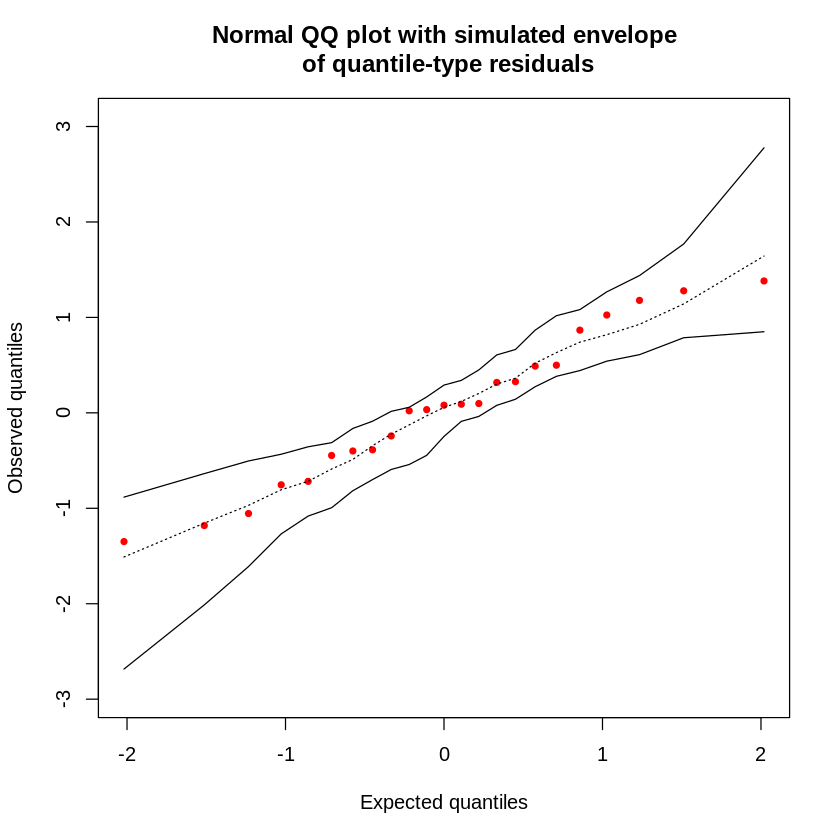

In [49]:
set.seed(02102022)
glmtoolbox::envelope(fita,type="quantile",rep=50,col="red")

# Punto 6

En estos datos, disponibles en el objeto $\texttt{rrates}$ del paquete $\texttt{GLMsData}$ de $\texttt{R}$, la variable respuesta es la velocidad de la reacción del catalizador ($\texttt{Rate}$), en 10 9 gmole por gramo, y las variables explicativas son la concentración de oxı́geno ($\texttt{Conc.O}$), en 10000 gmol por litro, y la temperatura ($\texttt{Temp}$), en grados Kelvin.

**(A)** Haga un análisis descriptivo a los datos. Comente.

In [50]:
data(rrates,package="GLMsData")
str(rrates)

'data.frame':	48 obs. of  4 variables:
 $ Run   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Conc.O: num  134.5 108 68.6 49.5 41.7 ...
 $ Temp  : int  623 623 623 623 623 623 623 623 623 623 ...
 $ Rate  : int  218 189 192 174 152 139 118 120 122 132 ...


In [51]:
summary(rrates[,-1])

     Conc.O            Temp          Rate       
 Min.   : 11.20   Min.   :623   Min.   : 118.0  
 1st Qu.: 23.18   1st Qu.:623   1st Qu.: 216.8  
 Median : 48.35   Median :648   Median : 343.5  
 Mean   : 65.35   Mean   :649   Mean   : 417.7  
 3rd Qu.:108.05   3rd Qu.:673   3rd Qu.: 598.8  
 Max.   :160.00   Max.   :673   Max.   :1129.0  

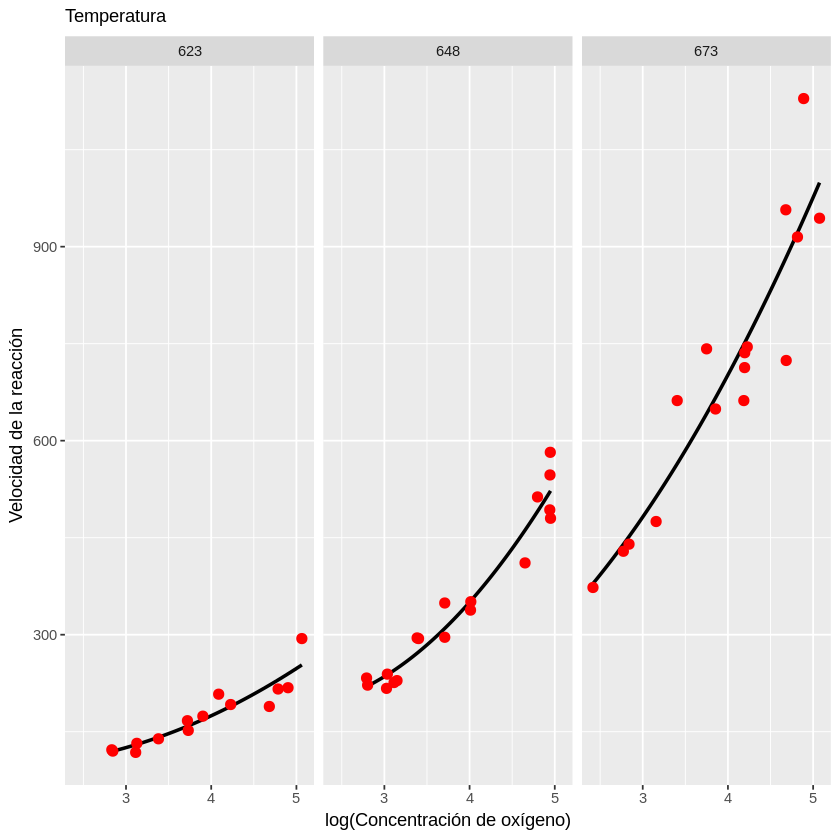

In [52]:
ggplot(rrates,aes(x=log(Conc.O),y=Rate)) +
       geom_smooth(method="lm",formula=y~poly(x,2),se=FALSE,col="black") +
       geom_point(color="red",size=2.5) +
       labs(x="log(Concentración de oxígeno)",y="Velocidad de la reacción",subtitle="Temperatura") + 
       facet_wrap(vars(Temp))

**(B)** Ajuste a los datos modelos con varias distribuciones para la variable respuesta (normal, lognormal, Gama, y normal inversa), varias funciones de enlace (logaritmo natural, inversa e identidad) y el predictor lineal dado por $1 + \texttt{log(Conc.O)} + \texttt{Temp}$. Use los criterios AIC, BIC y $R^2$ ajustado para comparar los modelos
candidatos y seleccionar el “mejor”.

In [53]:
fit1a <- glm(Rate ~ log(Conc.O) + Temp, family=Gamma(log), data=rrates)
fit1b <- glm(Rate ~ log(Conc.O) + Temp, family=Gamma(inverse), data=rrates)
fit1c <- glm(Rate ~ log(Conc.O) + Temp, family=Gamma(identity), data=rrates)

In [54]:
AIC(fit1a,fit1b,fit1c)
BIC(fit1a,fit1b,fit1c)
adjR2(fit1a,fit1b,fit1c)

,df,AIC
fit1a,4,472.6561
fit1b,4,546.3638
fit1c,4,554.6422


,df,BIC
fit1a,4,480.1409
fit1b,4,553.8486
fit1c,4,562.1270


       Deviance R-squared df adj.R-squared
fit1a 0.3776379    0.9795  3        0.9786
fit1b 1.7454420    0.9052  3        0.9010
fit1c 2.0716436    0.8875  3        0.8825


In [55]:
fit2a <- glm(Rate ~ log(Conc.O) + Temp, family=inverse.gaussian(log), data=rrates)
fit2b <- glm(Rate ~ log(Conc.O) + Temp, family=inverse.gaussian(inverse), data=rrates)
fit2c <- glm(Rate ~ log(Conc.O) + Temp, family=inverse.gaussian(identity), data=rrates)

In [56]:
AIC(fit2a,fit2b,fit2c)
BIC(fit2a,fit2b,fit2c)
adjR2(fit2a,fit2b,fit2c)

,df,AIC
fit2a,4,471.8690
fit2b,4,550.4285
fit2c,4,549.2396


,df,BIC
fit2a,4,479.3538
fit2b,4,557.9133
fit2c,4,556.7244


         Deviance R-squared df adj.R-squared
fit2a 0.001078708    0.9797  3        0.9788
fit2b 0.005542357    0.8959  3        0.8913
fit2c 0.005406770    0.8984  3        0.8939


In [57]:
fit3a <- glm(Rate ~ log(Conc.O) + Temp, family=gaussian(log), data=rrates)
fit3b <- glm(Rate ~ log(Conc.O) + Temp, family=gaussian(inverse), data=rrates)
fit3c <- glm(Rate ~ log(Conc.O) + Temp, family=gaussian(identity), data=rrates)

In [58]:
AIC(fit3a,fit3b,fit3c)
BIC(fit3a,fit3b,fit3c)
adjR2(fit3a,fit3b,fit3c)

,df,AIC
fit3a,4,520.9360
fit3b,4,556.8946
fit3c,4,568.9479


,df,BIC
fit3a,4,528.4208
fit3b,4,564.3794
fit3c,4,576.4327


      Deviance R-squared df adj.R-squared
fit3a 122944.9    0.9615  3        0.9598
fit3b 260049.5    0.9186  3        0.9150
fit3c 334281.3    0.8954  3        0.8907


In [59]:
fit4a <- glm(log(Rate) ~ log(Conc.O) + Temp, family=gaussian(identity), data=rrates)
fit4b <- glm(log(Rate) ~ log(Conc.O) + Temp, family=gaussian(inverse), data=rrates)
fit4c <- glm(log(Rate) ~ log(Conc.O) + Temp, family=gaussian(log), data=rrates)

In [60]:
AIC(fit4a,fit4b,fit4c)
BIC(fit4a,fit4b,fit4c)
adjR2(fit4a,fit4b,fit4c)

,df,AIC
fit4a,4,-88.40670
fit4b,4,-68.89239
fit4c,4,-82.96758


,df,BIC
fit4a,4,-80.92189
fit4b,4,-61.40759
fit4c,4,-75.48277


       Deviance R-squared df adj.R-squared
fit4a 0.3771362    0.9801  3        0.9792
fit4b 0.5663172    0.9701  3        0.9687
fit4c 0.4223867    0.9777  3        0.9767


In [61]:
c(AIC(fit1a),AIC(fit2a),AIC(fit3a),AIC(fit4a)+2*sum(fit4a$y))
c(BIC(fit1a),BIC(fit2a),BIC(fit3a),BIC(fit4a)+2*sum(fit4a$y))
adjR2(fit1a,fit2a,fit3a,fit4a)

[1] 472.6561 471.8690 520.9360 472.5294

[1] 480.1409 479.3538 528.4208 480.0142

          Deviance R-squared df adj.R-squared
fit1a 3.776379e-01    0.9795  3        0.9786
fit2a 1.078708e-03    0.9797  3        0.9788
fit3a 1.229449e+05    0.9615  3        0.9598
fit4a 3.771362e-01    0.9801  3        0.9792


In [62]:
summary(fit4a)


Call:
glm(formula = log(Rate) ~ log(Conc.O) + Temp, family = gaussian(identity), 
    data = rrates)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.207632  -0.056133  -0.007972   0.055312   0.180213  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.334e+01  4.378e-01  -30.48   <2e-16 ***
log(Conc.O)  3.731e-01  1.690e-02   22.08   <2e-16 ***
Temp         2.732e-02  6.698e-04   40.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.008380804)

    Null deviance: 18.91460  on 47  degrees of freedom
Residual deviance:  0.37714  on 45  degrees of freedom
AIC: -88.407

Number of Fisher Scoring iterations: 2


**Con el modelo seleccionado en (B)**


**(C)** Use las estadı́sticas de Wald y razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5 %, si el efecto de la concentración de oxı́geno sobre la velocidad esperada de la reacción del catalizador depende de la temperatura ($\texttt{Temp}$).

In [63]:
fit5 <- glm(log(Rate) ~ log(Conc.O) , family=gaussian(identity), data=rrates)
anova2(fit5,fit4a,test="wald")
anova2(fit5,fit4a,test="lr")


  Wald test 

Model 1 :  log(Rate) ~ log(Conc.O) 
Model 2 :  log(Rate) ~ log(Conc.O) + Temp 

        Chi    df  Pr(Chisq>)    
1 vs 2 1664.1   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Likelihood-ratio test 

Model 1 :  log(Rate) ~ log(Conc.O) 
Model 2 :  log(Rate) ~ log(Conc.O) + Temp 

        Chi    df  Pr(Chisq>)    
1 vs 2 1664.1   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [64]:
fit6 <- glm(Rate ~ log(Conc.O), family=inverse.gaussian(log), data=rrates)
anova2(fit6,fit2a,test="wald")
anova2(fit6,fit2a,test="lr")


  Wald test 

Model 1 :  Rate ~ log(Conc.O) 
Model 2 :  Rate ~ log(Conc.O) + Temp 

        Chi    df  Pr(Chisq>)    
1 vs 2 1707.3   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Likelihood-ratio test 

Model 1 :  Rate ~ log(Conc.O) 
Model 2 :  Rate ~ log(Conc.O) + Temp 

        Chi    df  Pr(Chisq>)    
1 vs 2 1697.5   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**(D)** Realice el análisis de diagnóstico (análisis residual y análisis de sensibilidad, y evalue si hay evidencia estadı́sticamente significativa en contra el supuesto de parámetro de dispersión constante). Comente.

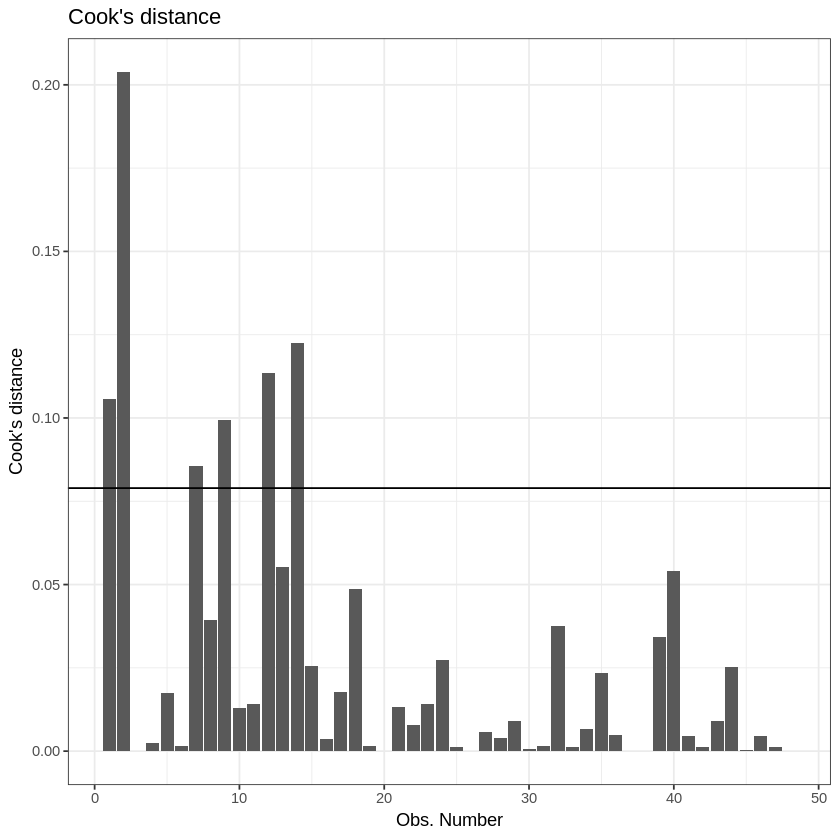

In [65]:
cd <- cooks.distance(fit2a)
p4<-ggplot(fit2a, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [66]:
rrates2 <- data.frame(rrates,mu=fitted(fit2a))
rrates2[c(1,2,9,12,14),]

,Run,Conc.O,Temp,Rate,mu
1,1,134.5,623,218,246.8346
2,2,108.0,623,189,227.6332
9,9,17.0,623,122,115.0520
12,12,59.6,623,208,182.7907
14,14,158.2,623,294,262.0708


In [67]:
fit6a <- update(fit2a,subset=-c(2,35,40,44))
cbind("coef"=fit2a$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit2a))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit2a)/(sqrt(diag(vcov(fit2a))))), nrow(model.matrix(fit2a))-ncol(model.matrix(fit2a))),
      "coef*" = fit6a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit6a))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit6a)/(sqrt(diag(vcov(fit6a))))), nrow(model.matrix(fit6a))-ncol(model.matrix(fit6a))),
      "Cambio coef(%)" = 100*(fit6a$coefficients-fit2a$coefficients)/abs(fit2a$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit6a)))-sqrt(diag(vcov(fit2a))))/abs(sqrt(diag(vcov(fit2a))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),-13.24340,0.42533,0,-12.97622,0.39844,0,2.01748,-6.32239
log(Conc.O),0.36905,0.01610,0,0.37912,0.01497,0,2.72740,-7.00079
Temp,0.02720,0.00066,0,0.02672,0.00062,0,-1.73467,-6.25413


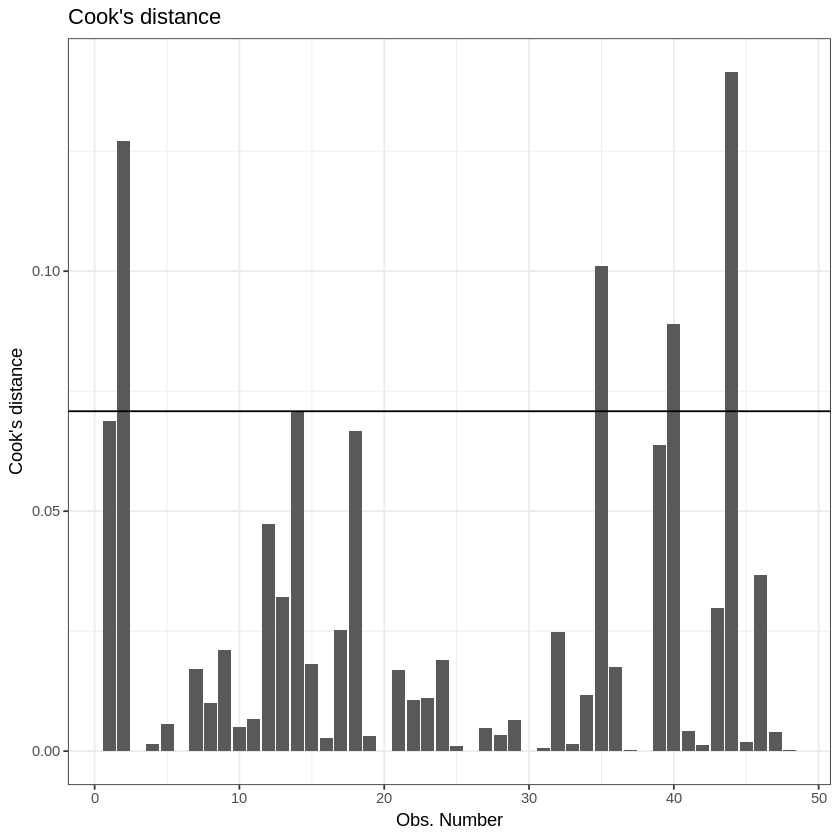

In [68]:
cd <- cooks.distance(fit4a)
p4<-ggplot(fit4a, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [69]:
rrates2 <- data.frame(rrates,mu=fitted(fit4a))
rrates2[c(2,35,40,44),]

,Run,Conc.O,Temp,Rate,mu
2,2,108.0,623,189,5.425481
35,41,132.8,673,1129,6.868859
40,46,30.1,673,662,6.315052
44,50,108.2,673,724,6.792424


In [70]:
fit5a <- update(fit4a,subset=-c(2,35,40,44))
cbind("coef"=fit4a$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit4a))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit4a)/(sqrt(diag(vcov(fit4a))))), nrow(model.matrix(fit4a))-ncol(model.matrix(fit4a))),
      "coef*" = fit5a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit5a))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit5a)/(sqrt(diag(vcov(fit5a))))), nrow(model.matrix(fit5a))-ncol(model.matrix(fit5a))),
      "Cambio coef(%)" = 100*(fit5a$coefficients-fit4a$coefficients)/abs(fit4a$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit5a)))-sqrt(diag(vcov(fit4a))))/abs(sqrt(diag(vcov(fit4a))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),-13.34495,0.43781,0,-13.05938,0.38901,0,2.13994,-11.14656
log(Conc.O),0.37311,0.01690,0,0.38226,0.01465,0,2.45455,-13.28156
Temp,0.02733,0.00067,0,0.02683,0.00060,0,-1.80523,-11.14372


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


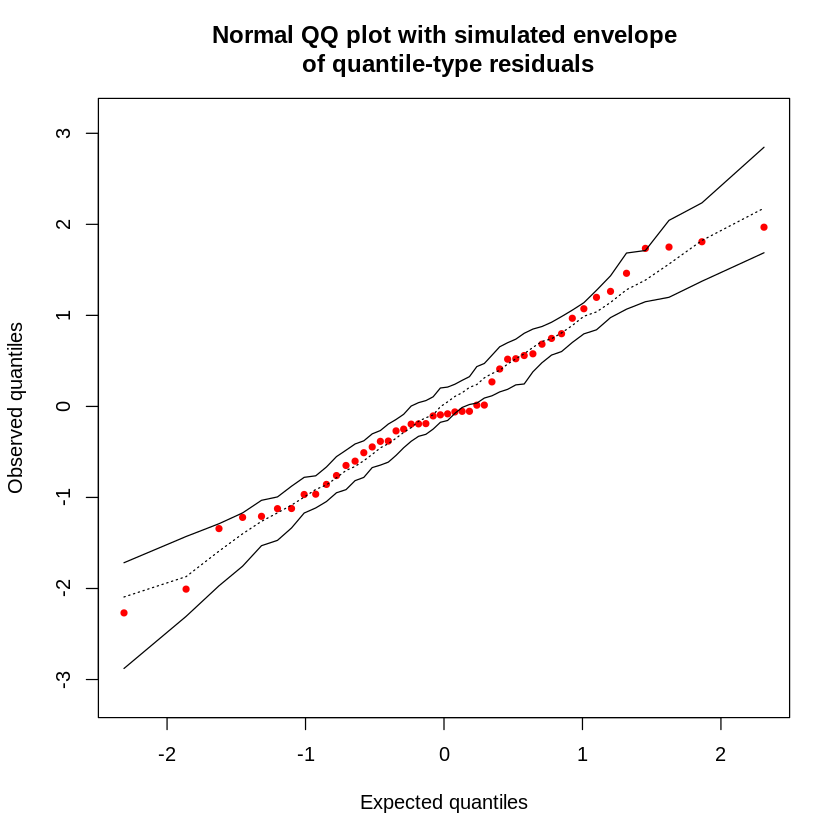

In [71]:
set.seed(02102022)
glmtoolbox::envelope(fit4a,type="quantile",rep=50,col="red")

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


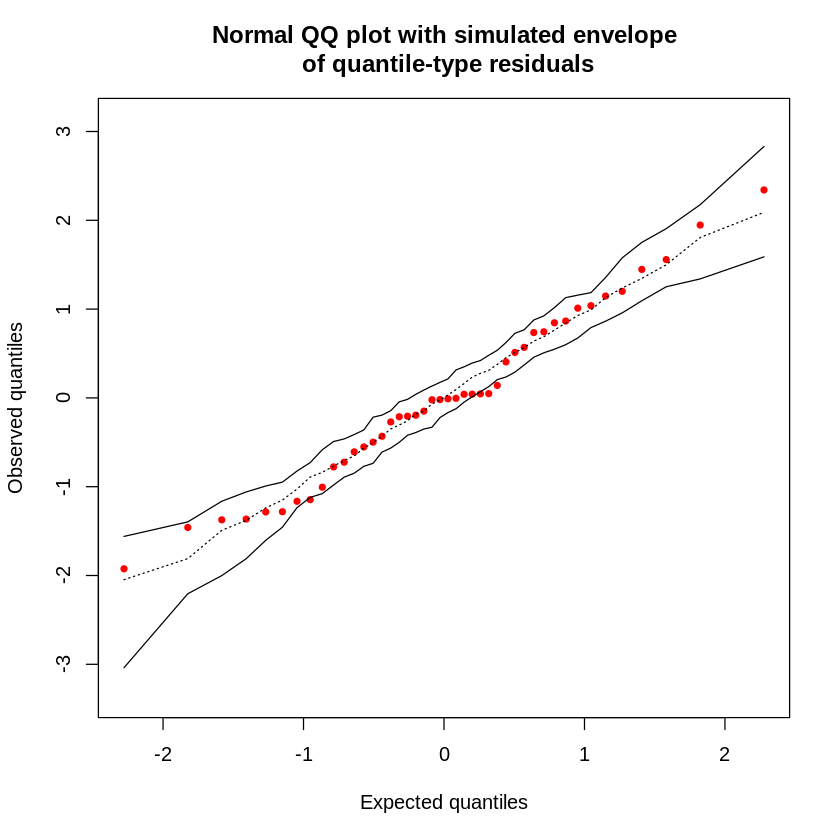

In [72]:
set.seed(02102022)
glmtoolbox::envelope(fit5a,type="quantile",rep=50,col="red")

In [73]:
vdtest(fit4a)
vdtest(fit5a)


             Score test for varying dispersion parameter

          Statistic =  4.48544 
 degrees of freedom =  2 
            p-value =  0.10617 


             Score test for varying dispersion parameter

          Statistic =  3.00886 
 degrees of freedom =  2 
            p-value =  0.22214 



# Punto 7

Este conjunto de datos, analizado por James et al (2013, página 15) y disponible en el objeto $\texttt{advertising}$ del paquete $\texttt{glmtoolbox}$ de R, consta de las ventas de un producto ($\texttt{sales}$) en 200 mercados diferentes, junto con los presupuestos de publicidad del producto en cada uno de esos mercados para dos medios diferentes: televisión ($\texttt{TV}$) y radio ($\texttt{radio}$). El objetivo del análisis consiste en explicar las diferencias entre los mercados con respecto a las ventas usando las diferencias entre los mismos en relación a sus presupuestos de publicidad en TV y radio.

**(A)** Haga un análisis descriptivo a los datos. Comente.

In [74]:
data(advertising,package="glmtoolbox")
str(advertising)

tibble [200 × 4] (S3: tbl_df/tbl/data.frame)
 $ TV       : num [1:200] 230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num [1:200] 37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num [1:200] 69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num [1:200] 22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


In [75]:
summary(advertising[,c("sales","TV","radio")])

     sales             TV             radio       
 Min.   : 1.60   Min.   :  0.70   Min.   : 0.000  
 1st Qu.:10.38   1st Qu.: 74.38   1st Qu.: 9.975  
 Median :12.90   Median :149.75   Median :22.900  
 Mean   :14.02   Mean   :147.04   Mean   :23.264  
 3rd Qu.:17.40   3rd Qu.:218.82   3rd Qu.:36.525  
 Max.   :27.00   Max.   :296.40   Max.   :49.600  

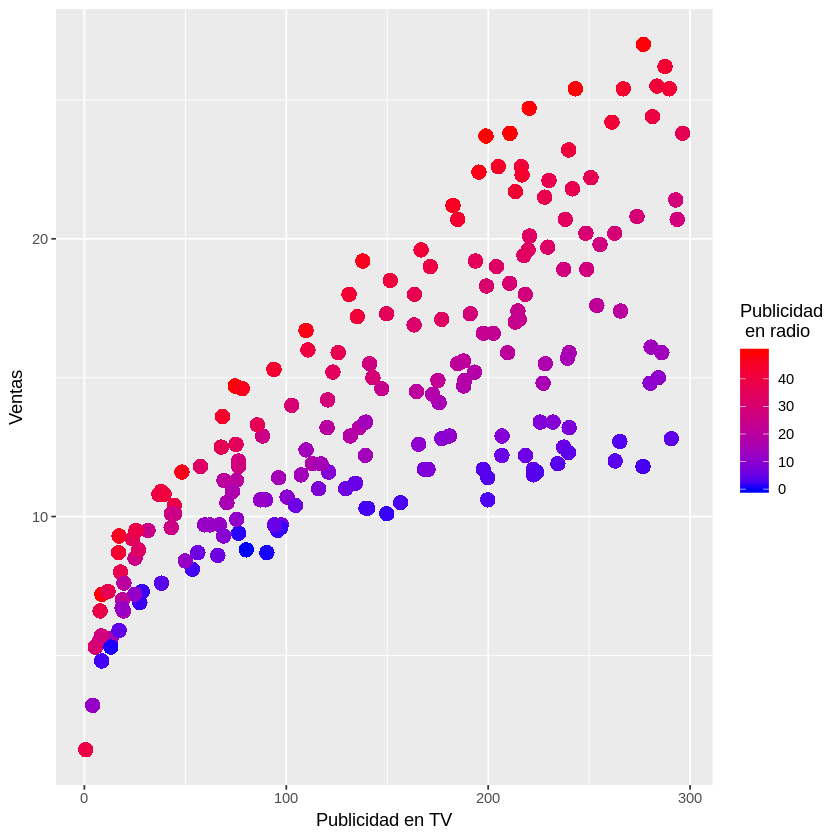

In [76]:
ggplot(advertising,aes(x=TV,y=sales,color=radio)) +
       geom_point(size=4,shape=16) +
       scale_size(range=c(0,5)) + 
       labs(x="Publicidad en TV",y="Ventas",color="Publicidad\n en radio") + 
       scale_color_gradient(low="blue",high="red",breaks=seq(0,50,10))

**(B)** Ajuste a los datos modelos con varias distribuciones para la variable respuesta (normal, lognormal, Gama, y normal inversa), varias funciones de enlace (logaritmo natural, inversa e identidad) y el predictor lineal dado por $1 + \texttt{log(TV)} + \texttt{radio} + \texttt{log(TV):radio}$. Use los criterios AIC, BIC y $R^2$ ajustado para comparar los modelos candidatos y seleccionar el “mejor”.

In [77]:
fit1 <- glm(sales ~ log(TV) + radio + log(TV)*radio, family=Gamma(log), data=advertising)
fit2 <- glm(sales ~ log(TV) + radio + log(TV)*radio, family=inverse.gaussian(log), data=advertising)
fit3 <- glm(sales ~ log(TV) + radio + log(TV)*radio, family=gaussian(log), data=advertising)
fit4 <- glm(log(sales) ~ log(TV) + radio + log(TV)*radio, family=gaussian(identity), data=advertising)

In [78]:
c(AIC(fit1),AIC(fit2),AIC(fit3),AIC(fit4)+2*sum(fit4$y))
c(BIC(fit1),BIC(fit2),BIC(fit3),BIC(fit4)+2*sum(fit4$y))
adjR2(fit1,fit2,fit3,fit4)

[1] 396.9636 567.2713 309.3474 401.6131

[1] 413.4552 583.7629 325.8390 418.1047

        Deviance R-squared df adj.R-squared
fit1  0.48040604    0.9843  4        0.9841
fit2  0.08671091    0.9688  4        0.9683
fit3 52.30946575    0.9903  4        0.9902
fit4  0.49190214    0.9856  4        0.9854


In [79]:
summary(fit3)


Call:
glm(formula = sales ~ log(TV) + radio + log(TV) * radio, family = gaussian(log), 
    data = advertising)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.29278  -0.35848   0.01735   0.33568   1.42959  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.0302249  0.0467959  22.015   <2e-16 ***
log(TV)        0.2646359  0.0092146  28.719   <2e-16 ***
radio         -0.0043242  0.0014929  -2.896   0.0042 ** 
log(TV):radio  0.0036644  0.0002909  12.598   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2668851)

    Null deviance: 5417.149  on 199  degrees of freedom
Residual deviance:   52.309  on 196  degrees of freedom
AIC: 309.35

Number of Fisher Scoring iterations: 5


**Con el modelo seleccionado en (B)**


**(C)** Realice el análisis de diagnóstico (análisis residual y análisis de sensibilidad). Comente.

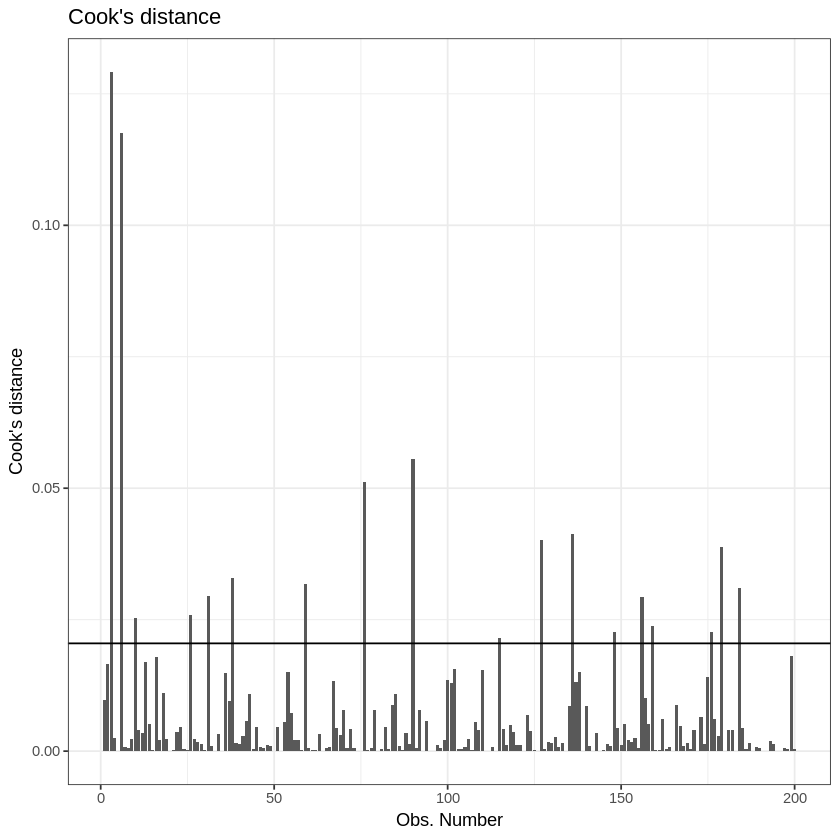

In [80]:
cd <- cooks.distance(fit3)
p4<-ggplot(fit3, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [81]:
advertising2 <- data.frame(advertising,mu=fitted(fit3))
advertising2[c(3,6,76,90,127,136,179),]

,TV,radio,newspaper,sales,mu
3,17.2,45.9,69.3,9.3,7.870412
6,8.7,48.9,75.0,7.2,5.923381
76,16.9,43.7,89.4,8.7,7.707662
90,109.8,47.8,51.4,16.7,17.992779
127,7.8,38.9,50.6,6.6,5.465267
136,48.3,47.0,8.5,11.6,12.439681
179,276.7,2.3,23.7,11.8,12.880311


In [82]:
fit3a <- update(fit3,subset=-c(3,6,76,90,127,136,179))
cbind("coef"=fit3$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit3))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit3)/(sqrt(diag(vcov(fit3))))), nrow(model.matrix(fit3))-ncol(model.matrix(fit3))),
      "coef*" = fit3a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit3a))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit3a)/(sqrt(diag(vcov(fit3a))))), nrow(model.matrix(fit3a))-ncol(model.matrix(fit3a))),
      "Cambio coef(%)" = 100*(fit3a$coefficients-fit3$coefficients)/abs(fit3$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit3a)))-sqrt(diag(vcov(fit3))))/abs(sqrt(diag(vcov(fit3))))
     ) %>% round(.,5)  

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),1.03022,0.04680,0.0000,1.05073,0.04413,0e+00,1.99005,-5.69068
log(TV),0.26464,0.00921,0.0000,0.26099,0.00869,0e+00,-1.37873,-5.72976
radio,-0.00432,0.00149,0.0042,-0.00620,0.00152,7e-05,-43.27708,1.75320
log(TV):radio,0.00366,0.00029,0.0000,0.00402,0.00029,0e+00,9.57931,1.11996


  |+++++++++++++++++++++++++| 100%


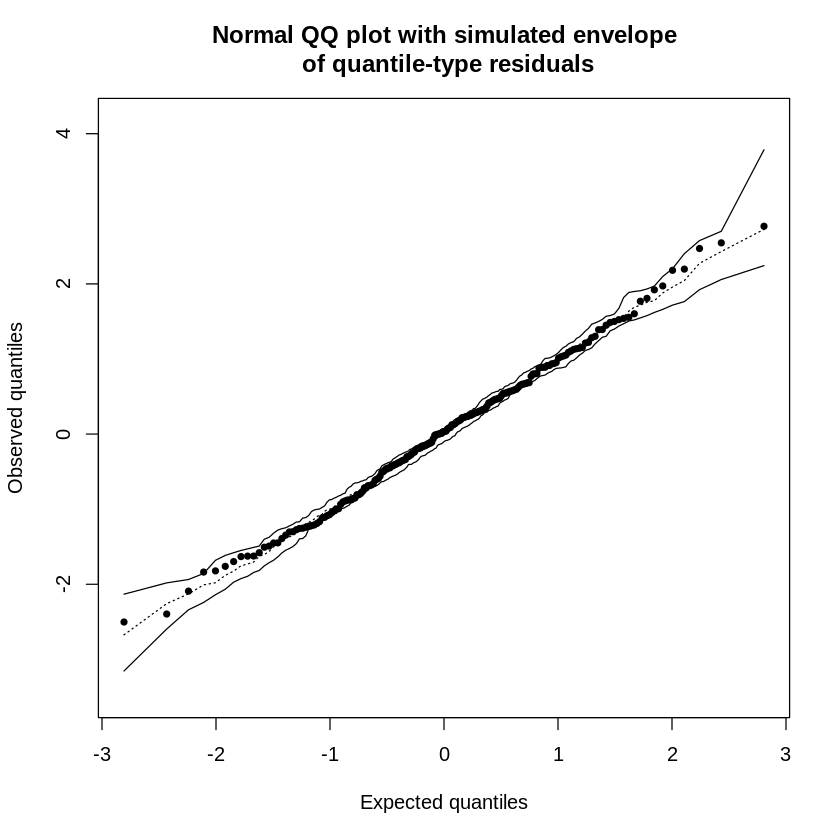

In [83]:
set.seed(02102022)
glmtoolbox::envelope(fit3,type="quantile")

  |+++++++++++++++++++++++++| 100%


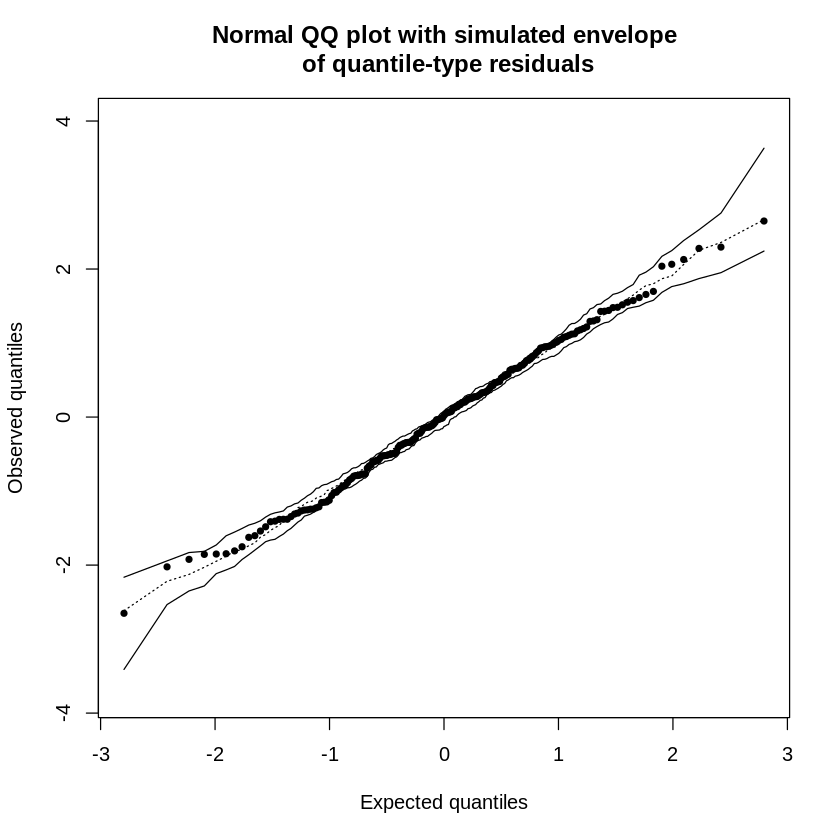

In [84]:
set.seed(02102022)
glmtoolbox::envelope(fit3a,type="quantile")

**(D)** Evalue si hay evidencia estadı́sticamente significativa en contra el supuesto de parámetro de dispersión constante. Hágalo también excluyendo las observaciones “influyentes”.

In [85]:
vdtest(fit3)
vdtest(fit3a)


             Score test for varying dispersion parameter

          Statistic =  28.76865 
 degrees of freedom =  3 
            p-value =  2.5046e-06 


             Score test for varying dispersion parameter

          Statistic =  5.98091 
 degrees of freedom =  3 
            p-value =  0.11254 



# Punto 8
Este conjunto de datos, analizado por Rieck y Nedelman (1991) y disponible en el objeto $\texttt{Biaxial}$ del paquete $\texttt{ssym}$ de $\texttt{R}$, describe la vida ($\texttt{Life}$), en número de ciclos, de una pieza de metal, y la cantidad de trabajo por ciclo ($\texttt{Work}$). El objetivo del análisis consiste en explicar las diferencias entre la vida de las piezas de metal usando las diferencias en el trabajo por ciclo al que fueron expuestas.

**(A)** Haga un análisis descriptivo a los datos. Comente.

In [86]:
data(Biaxial,package="ssym")
str(Biaxial)

'data.frame':	46 obs. of  2 variables:
 $ Work: num  11.5 13 14.3 15.6 16 17.3 19.3 21.1 21.5 22.6 ...
 $ Life: int  3280 5046 1563 4707 977 2834 2266 2208 1040 700 ...


In [87]:
summary(Biaxial)

      Work             Life       
 Min.   : 11.50   Min.   : 125.0  
 1st Qu.: 24.00   1st Qu.: 242.8  
 Median : 33.20   Median : 566.0  
 Mean   : 40.29   Mean   : 943.7  
 3rd Qu.: 60.12   3rd Qu.:1086.2  
 Max.   :100.50   Max.   :5046.0  

**(B)** Haga un gráfico de la vida de las piezas de metal como una función de la cantidad de trabajo por ciclo al que fueron expuestas. Haga también un gráfico del logarı́tmo natural de la vida de las piezas de metal como una función del logarı́tmo natural de la cantidad del trabajo por ciclo a la que fueron expuestas. Comente.

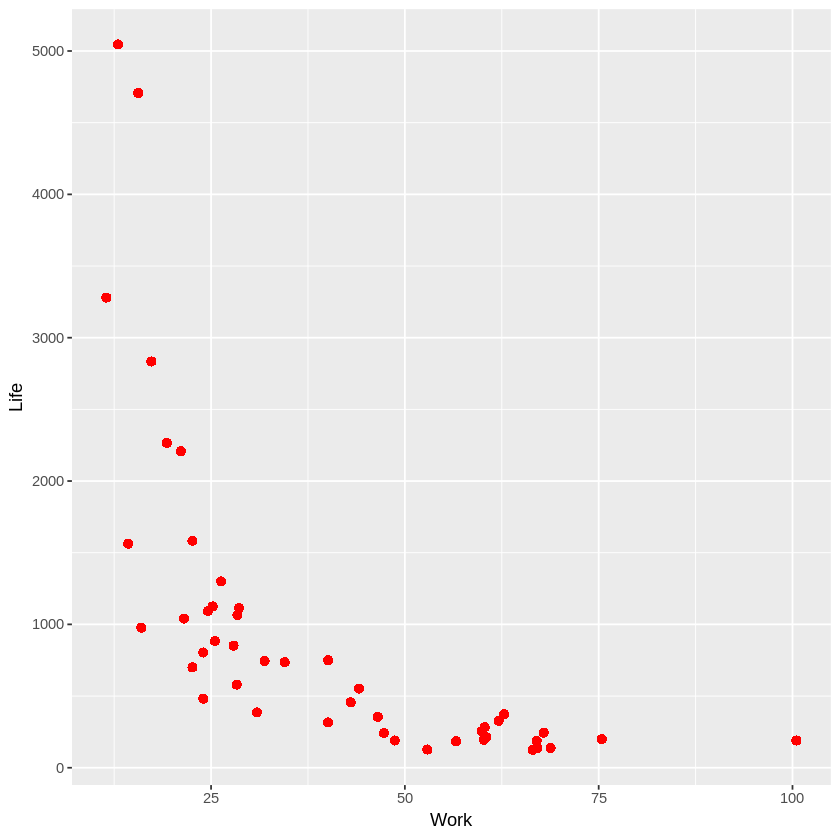

In [88]:
ggplot(Biaxial) +
       geom_point(aes(x=Work,y=Life),shape=16,col="red",size=2.5)
dev.new()
ggplot(Biaxial) +
       geom_point(aes(x=log(Work),y=log(Life)),shape=16,col="red",size=2.5)

**(C)** Ajuste a los datos los siguientes modelos

+ $Y_k \sim^{iid} Normal-inversa(\beta_1 x_k^{\beta_2}, \phi)$
    
+ $Y_k = \beta_1 x_k^{\beta_2} \epsilon_k$ , en que $\epsilon_k  \sim^{iid} Gama(1, \phi)$
    
+ $Y_k = \beta_1 x_k^{\beta_2} + \epsilon_k$, en que $\epsilon_k \sim^{iid} Normal(0, \phi)$
    
+ $Y_k = \beta_1 x_k^{\beta_2} \epsilon_k$, en que $\epsilon_k \sim^{iid} Lognormal(1, \phi)$

donde $y$ y $x$ representan, la vida de la pieza de metal y la cantidad de trabajo a la
que fue expuesta, respectivamente. Compare los modelos ajustados gráficamente
y usando los criterios AIC, BIC y $R^2$ ajustado. Seleccione el “mejor” modelo.

In [89]:
fit1 <- glm(Life ~ log(Work), family=inverse.gaussian(log), data=Biaxial)
fit2 <- glm(Life ~ log(Work), family=Gamma(log), data=Biaxial)
fit3 <- glm(Life ~ log(Work), family=gaussian(log), data=Biaxial)
fit4 <- glm(log(Life) ~ log(Work), family=gaussian(identity), data=Biaxial)

In [90]:
c(AIC(fit1),AIC(fit2),AIC(fit3),AIC(fit4)+2*sum(fit4$y))
c(BIC(fit1),BIC(fit2),BIC(fit3),BIC(fit4)+2*sum(fit4$y))
adjR2(fit1,fit2,fit3,fit4)

[1] 647.6803 635.7286 722.1570 636.4797

[1] 653.1662 641.2145 727.6429 641.9656

         Deviance R-squared df adj.R-squared
fit1 1.694167e-02    0.7722  2        0.7671
fit2 7.210475e+00    0.8464  2        0.8429
fit3 1.554726e+07    0.7202  2        0.7139
fit4 7.523020e+00    0.8333  2        0.8295


In [91]:
summary(fit2)


Call:
glm(formula = Life ~ log(Work), family = Gamma(log), data = Biaxial)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.76925  -0.38003  -0.03887   0.25131   0.75025  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.4449     0.3869   32.16   <2e-16 ***
log(Work)    -1.6945     0.1076  -15.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.1554257)

    Null deviance: 46.9494  on 45  degrees of freedom
Residual deviance:  7.2105  on 44  degrees of freedom
AIC: 635.73

Number of Fisher Scoring iterations: 5


**Con el modelo seleccionado en (C)**

**(D)** Use las estadı́sticas de Wald y razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5 %, si la vida esperada de las piezas de metal depende de la cantidad de trabajo al que fueron expuestas.

In [92]:
fit2a <- update(fit2,formula=. ~ . - log(Work))
anova2(fit2a,fit2,test="wald")
anova2(fit2a,fit2,test="lr")


  Wald test 

Model 1 :  Life ~ 1 
Model 2 :  Life ~ log(Work) 

        Chi    df  Pr(Chisq>)    
1 vs 2 248.21   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Likelihood-ratio test 

Model 1 :  Life ~ 1 
Model 2 :  Life ~ log(Work) 

        Chi    df  Pr(Chisq>)    
1 vs 2 255.68   1   < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**(E)** Haga el análisis de diagnóstico (análisis residual, análisis de sensibilidad, y evalue si hay evidencia estadı́sticamente significativa en contra el supuesto de parámetro de dispersión constante). Comente.

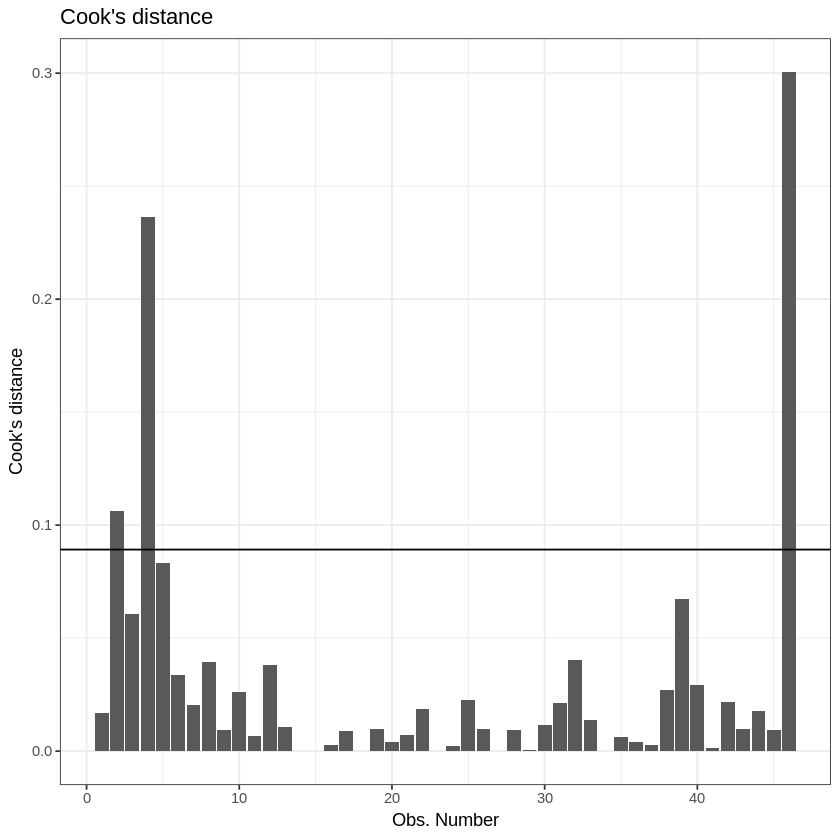

In [93]:
cd <- cooks.distance(fit2)
p4<-ggplot(fit2, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [94]:
Biaxial2 <- data.frame(Biaxial,mu=fitted(fit2))
Biaxial2[c(2,4,46),]

,Work,Life,mu
2,13.0,5046,3290.1252
4,15.6,4707,2415.7016
46,100.5,190,102.8391


In [95]:
fit2a <- update(fit2,subset=-c(2,4,46))
cbind("coef"=fit2$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit2))),
      "Pr(>|z|)" = 2*pt(-abs(coef(fit2)/(sqrt(diag(vcov(fit2))))), nrow(model.matrix(fit2))-ncol(model.matrix(fit2))),
      "coef*" = fit2a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit2a))),
      "Pr(>|z|)*" = 2*pt(-abs(coef(fit2a)/(sqrt(diag(vcov(fit2a))))), nrow(model.matrix(fit2a))-ncol(model.matrix(fit2a))),
      "Cambio coef(%)" = 100*(fit2a$coefficients-fit2$coefficients)/abs(fit2$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit2a)))-sqrt(diag(vcov(fit2))))/abs(sqrt(diag(vcov(fit2))))
     ) %>% round(.,5) 

,coef,Std.Error,Pr(>|z|),coef*,Std.Error*,Pr(>|z|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),12.44487,0.38695,0,12.22598,0.40028,0,-1.75892,3.44530
log(Work),-1.69446,0.10755,0,-1.64887,0.11092,0,2.69037,3.12604


  |+++++++++++++++++++++++++| 100%


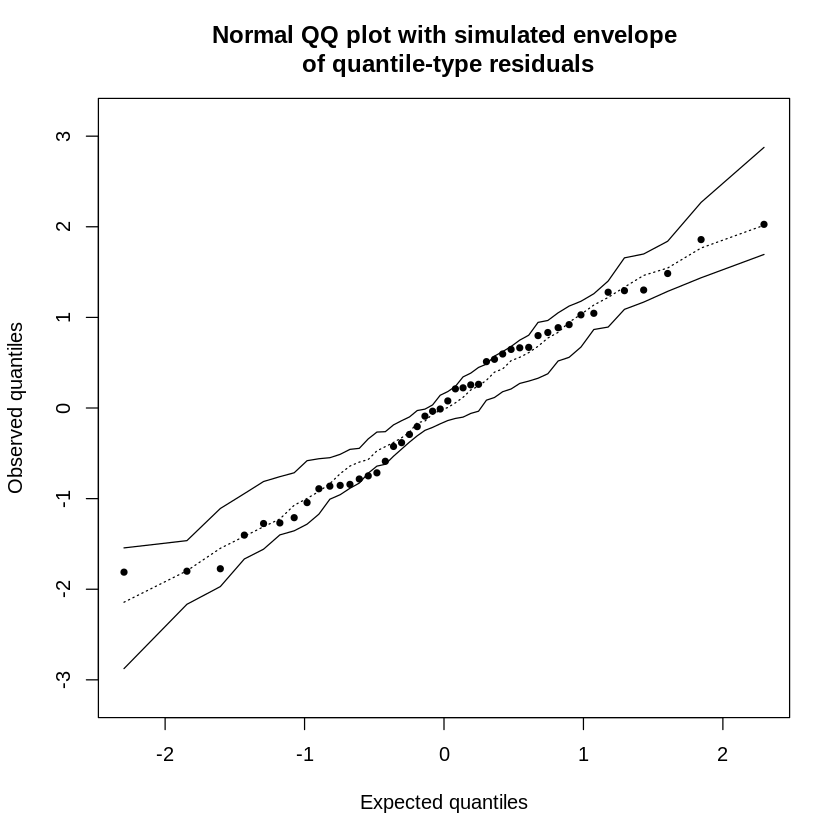

In [96]:
set.seed(02102022)
glmtoolbox::envelope(fit2,type="quantile")

  |+++++++++++++++++++++++++| 100%


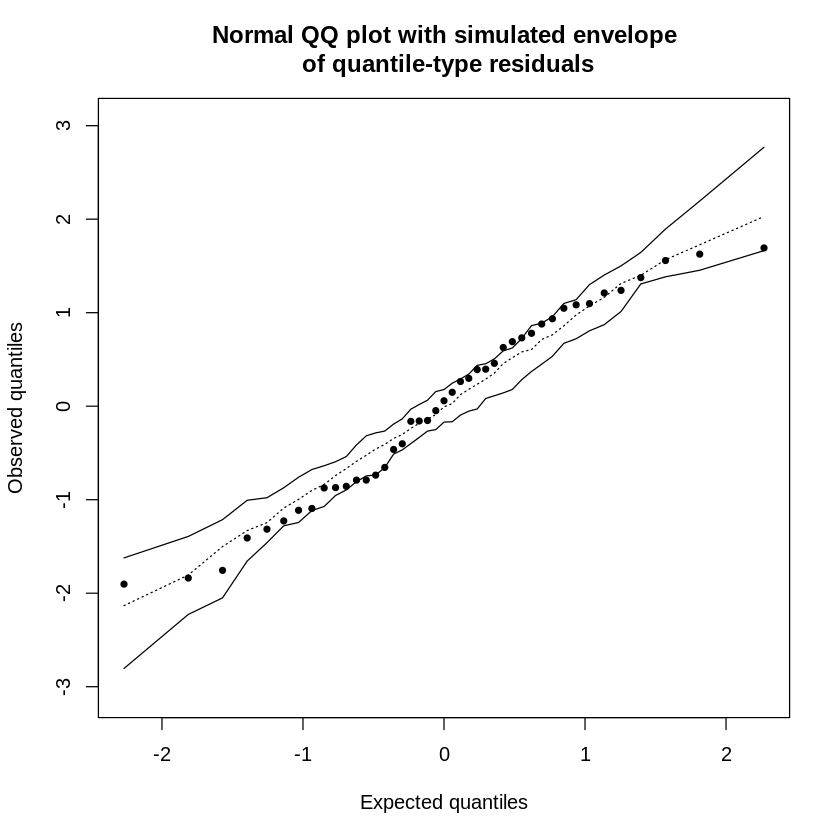

In [97]:
set.seed(02102022)
glmtoolbox::envelope(fit2a,type="quantile")

In [98]:
vdtest(fit2)
vdtest(fit2a)


             Score test for varying dispersion parameter

          Statistic =  0.5435 
 degrees of freedom =  1 
            p-value =  0.46099 


             Score test for varying dispersion parameter

          Statistic =  0.4972 
 degrees of freedom =  1 
            p-value =  0.48073 



**(G)** Estime la vida esperada, en número de ciclos, de una pieza de metal cuando el trabajo por ciclo es 40. Haga esta estimación “manualmente” y usando la función $\texttt{predict()}$.

In [99]:
exp(sum(coef(fit2)*c(1,log(40))))
predict(fit2,new=data.frame(Work=40),type="response")

[1] 489.9144

1 
489.9144

In [100]:

sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/fm/anaconda3/envs/R/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_CO.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_CO.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_CO.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_CO.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ssym_1.5.7         survival_2.44-1.1  normalp_0.7.2      numDeriv_2016.8-1 
 [5] GIGrvg_0.7         GLMsData_1.4       gridExtra_2.3      ggplot2_3.1.1     
 [9] dplyr_1.0.10       glmtoolbox_0.1.4   Formula_1.2-4      Rfast_2.0.6       
[13] RcppZiggurat_0.1.6 Rcpp_1.0.1        

loaded via a namespace (and 